# Tarea 2 Aprendizaje Profundo
Alumno: Diego Iruretagoyena


---
**Fuentes**

Para responder esta tarea usé distintos recursos.


-> Hice el curso de Coursera "Deep Learning with PyTorch : Generative Adversarial Network" 
https://www.coursera.org/account/accomplishments/certificate/ZACRDSMA6WN3

https://github.com/C0sch0/PyTorch_GAN_DL_MNIST

-> Hice la Semana 4 del curso Coursera "Introduction to Machine Learning
by Duke University" para aprender sobre Embeddings, RNN, LSTM en detalle y aplicar esas estructuras a NLP. 
https://www.coursera.org/learn/machine-learning-duke/home/week/4

-> Pytorch RNN en Youtube - 
https://www.youtube.com/watch?v=Gl2WXLIMvKA&t=286s 
https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/Basics/pytorch_rnn_gru_lstm.py

-> Clases Aprendizaje Profundo IIC3, profesor Alvaro Soto

-> Ayudantías T02 Ayudante Alberto Valdés

-> Understanding LSTM Networks 
https://colah.github.io/posts/2015-08-Understanding-LSTMs/


-> The Unreasonable Effectiveness of Recurrent Neural Networks
http://karpathy.github.io/2015/05/21/rnn-effectiveness/

---


# Parte 1

# Contexto

En esta tarea desarrollaremos la idea de poder crear un modelo que reconozca entre frases Spam y No Spam.

Para esto, utilizamos conceptos de NLP como creación de embeddings a partir de frases y la utilización de modelos como RNN, GRU, LSTM, bi-LSTM para la tarea de clasificación. Luego presentamos métricas sobre los resultados.

# Embeddings

Las palabras son comportamientos de fenómenos y no son números. Necesitamos una forma de mapear estas palabras/letras a números con los que podamos analizar. Esta idea de mapear Palabras a Vec se llama Word2Vec. Cada uno de estos vectores se llama a menudo "embedding" ("incrustación").

La idea de mapear cada palabra a un vector está ligada a mapear cada palabra a una incrustación. La idea es incrustar la palabra en un nuevo espacio de características.

w(i) = i-ésima palabra del vocabulario. La idea de esta incrustación de palabras es que tomaremos cada letra en un vector de tamaño m. m puede ser 100, 200, depende. La idea clave es que asignaremos cada palabra a un vector de m dimensiones. La dimensionalidad depende del problema particular que elijamos.

imagen

Después de hacer este aprendizaje, aprendemos un libro de códigos de vocabulario. M-dimensional.

Así, cada vector c(i) se asocia con la ith palabra w(i). Deseamos que dos palabras similares estén muy cerca una de la otra Aprenderemos los vectores basándonos en un gran corpus de texto. Una vez hecho el mapeo, estamos listos para empezar a aplicar nuestros modelos. Hay múltiples formas de crear estas incrustaciones.

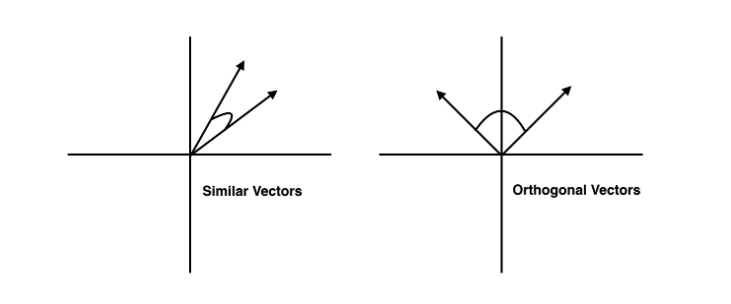

In [ ]:
from IPython.display import Image
Image('images/VectoresSimilares.png')

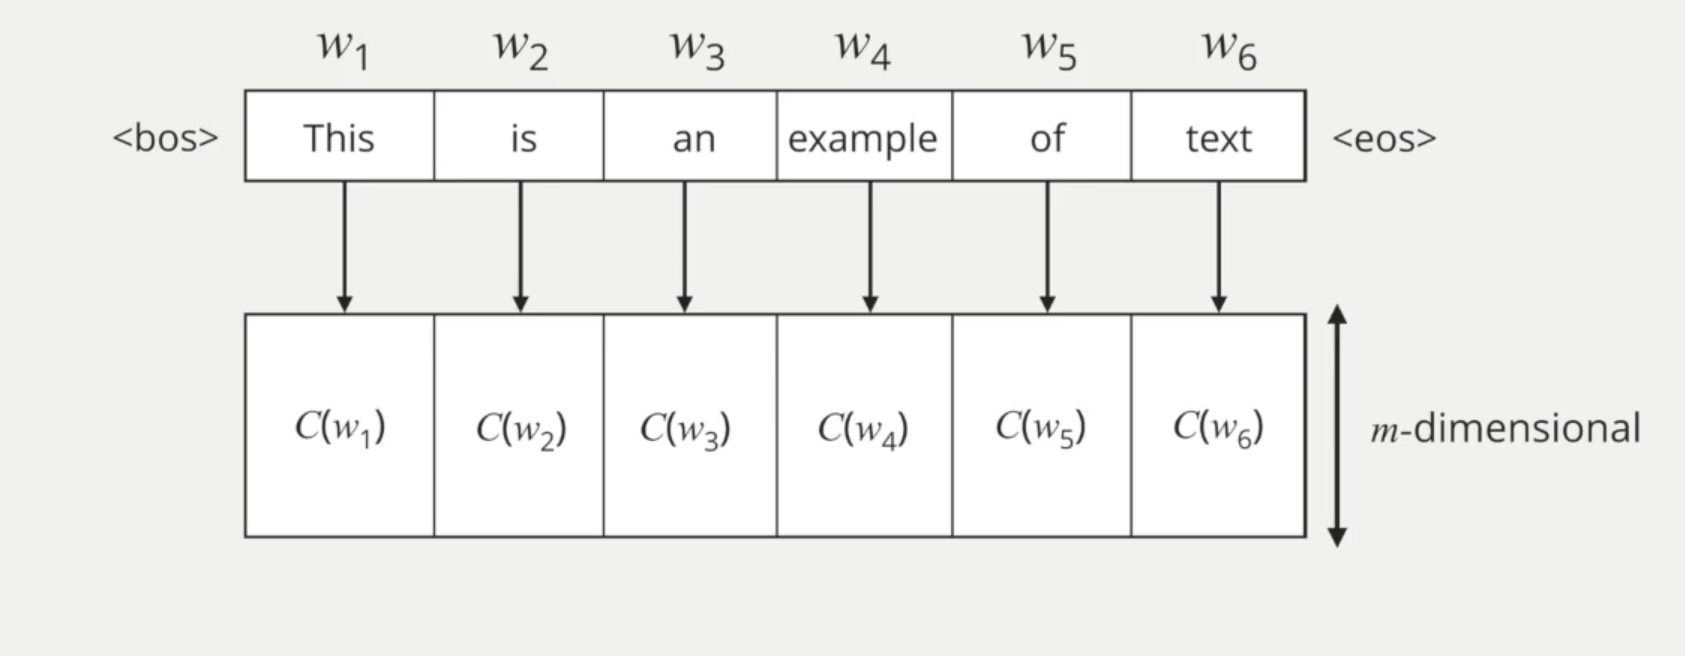

In [ ]:
from IPython.display import Image
Image('images/vocabularyCodeBook.png')

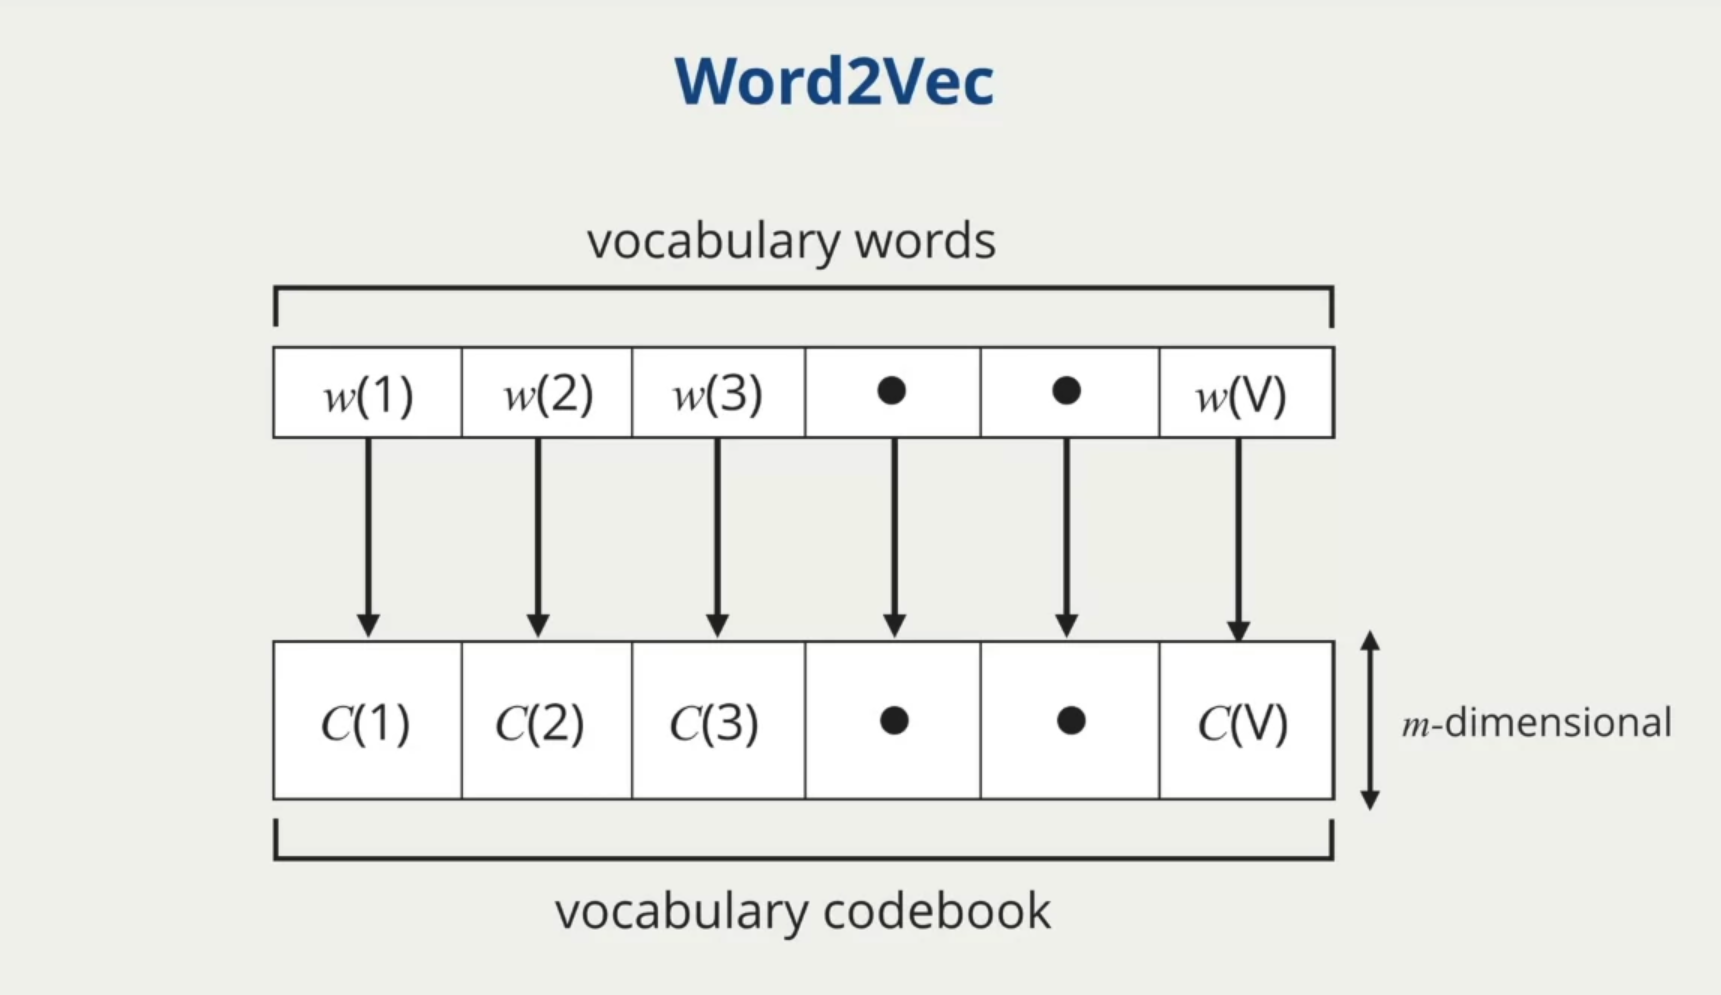

In [ ]:
from IPython.display import Image
Image('./images/CodeBook.png')






# Redes neuronales recurrentes
Los seres humanos no empiezan su pensamiento desde cero cada segundo. Mientras lees esta redacción, comprendes cada palabra basándote en tu comprensión de las palabras anteriores. No tiras todo a la basura y empiezas a pensar desde cero otra vez. Tus pensamientos tienen persistencia.

Las redes neuronales tradicionales no pueden hacer esto, y parece un gran defecto. Por ejemplo, imagina que quieres clasificar qué tipo de evento está ocurriendo en cada momento de una película. No está claro cómo una red neuronal tradicional podría utilizar su razonamiento sobre los acontecimientos anteriores de la película para informar sobre los posteriores. Las redes neuronales recurrentes abordan este problema. Son redes con bucles que permiten que la información persista.

Funciona al tomar el vector. asociado con la n-1 palabra y el vector oculto asociado con la palabra w_{n-1}, h_{n-1}

Se concatenan los vectores, creando X_{n-1}. Esto es enviado al modelo para el vector oculto h_n, set de pesos W multiplicados por el input X_{n-1}. Se agrega el bias más la ponderación de cada input, para luego ser enviado a una función no linear.

El proceso de sumar los resultados de ponderar el input y agregar el bias es llamado Softmax, el cual mapea el vector a las probabilidades de clase.






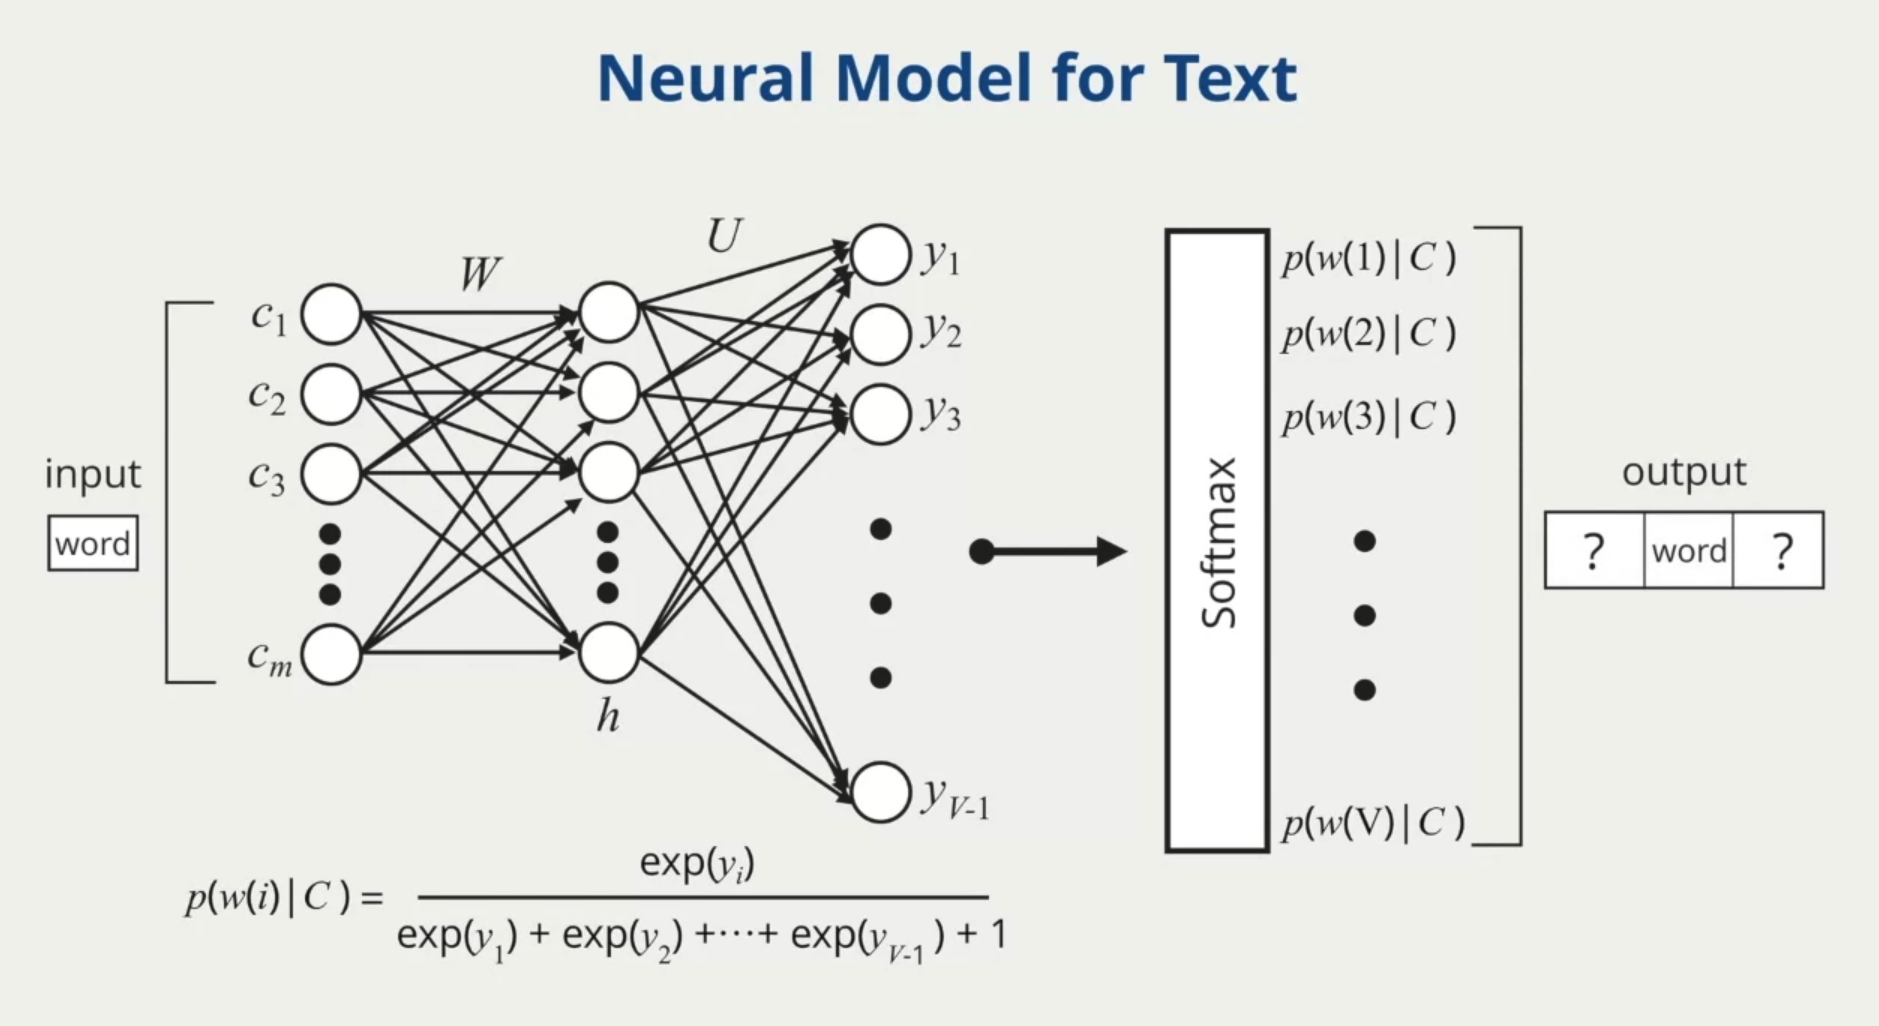

In [ ]:
from IPython.display import Image
Image('images/NNText.png')


# RNN - LSTM

La RNN es una extensión natural del MLP. Es una repetición del perceptrón multicapa básico. Sin embargo, se ha descubierto que las RNN no son tan eficaces como nos gustaría. Introduciremos una forma más complicada que se basará en el concepto de MLP pero de una forma mucho más sofisticada. La memoria a largo plazo. LSTM representa el estado del arte en el Procesamiento del Lenguaje Natural. La metodología es la comprensión del trabajo. Esta tecnología es lo que está impulsando la reciente revolución en NLP.

La LSTM se utiliza para modelar secuencias de datos. El lenguaje es natural para el LSTM, ya que el lenguaje es una secuencia de palabras. Aquí, representamos las palabras como vectores y operamos el LSTM sobre la secuencia de vectores de los documentos. LSTM es el estado del arte, obteniendo un rendimiento récord.. Se compone de 3 redes neuronales de control que tienen vectores de salida Fn, in, y on. Cada nn tiene la misma forma de un MLP. La función no lineal para cada una de estas unidades de control es una función sigmoidea sigma, lo que significa que cada uno de los componentes son números entre 0 y 1.

En la LSTM introducimos un nuevo vector, una célula de memoria, que se representa por C. La célula de memoria se actualiza mediante una cuarta red neuronal que tiene una función no lineal correspondiente a la tangente hiperbólica. De nuevo un perceptrón multicapa, pero entonces la función no lineal es una tangente hiperbólica, lo que significa que c hasta n tiene componentes o tiene elementos en el vector c hasta n que son cada uno un número entre menos uno y uno. 

Estos cuatro nns del bloque superior se utilizan entonces para actualizar la celda de memoria Cn y para actualizar también la variable oculta Hn. Lo hacemos tomando las salidas de control para operar en la celda de memoria anterior y nuestra nueva estimación. La salida de eso es entonces enviada a una tangente hiperbólica y es operada por la salida del newtork con.

Todos los parámetros del LSTM pueden ser aprendidos usando datos no etiquetados. Los vectores de palabras pueden ser tratados como params adicionales, y aprendidos también. Permite la incrustación de vectores de palabras y la síntesis de texto. Esta capacidad de sintetizar texto es crítica para diferentes casos de uso, por ejemplo, la traducción. LSTM sintetiza textos de forma muy eficaz. h_0 y c_0 deben inicializarse en función de la tarea de aprendizaje.




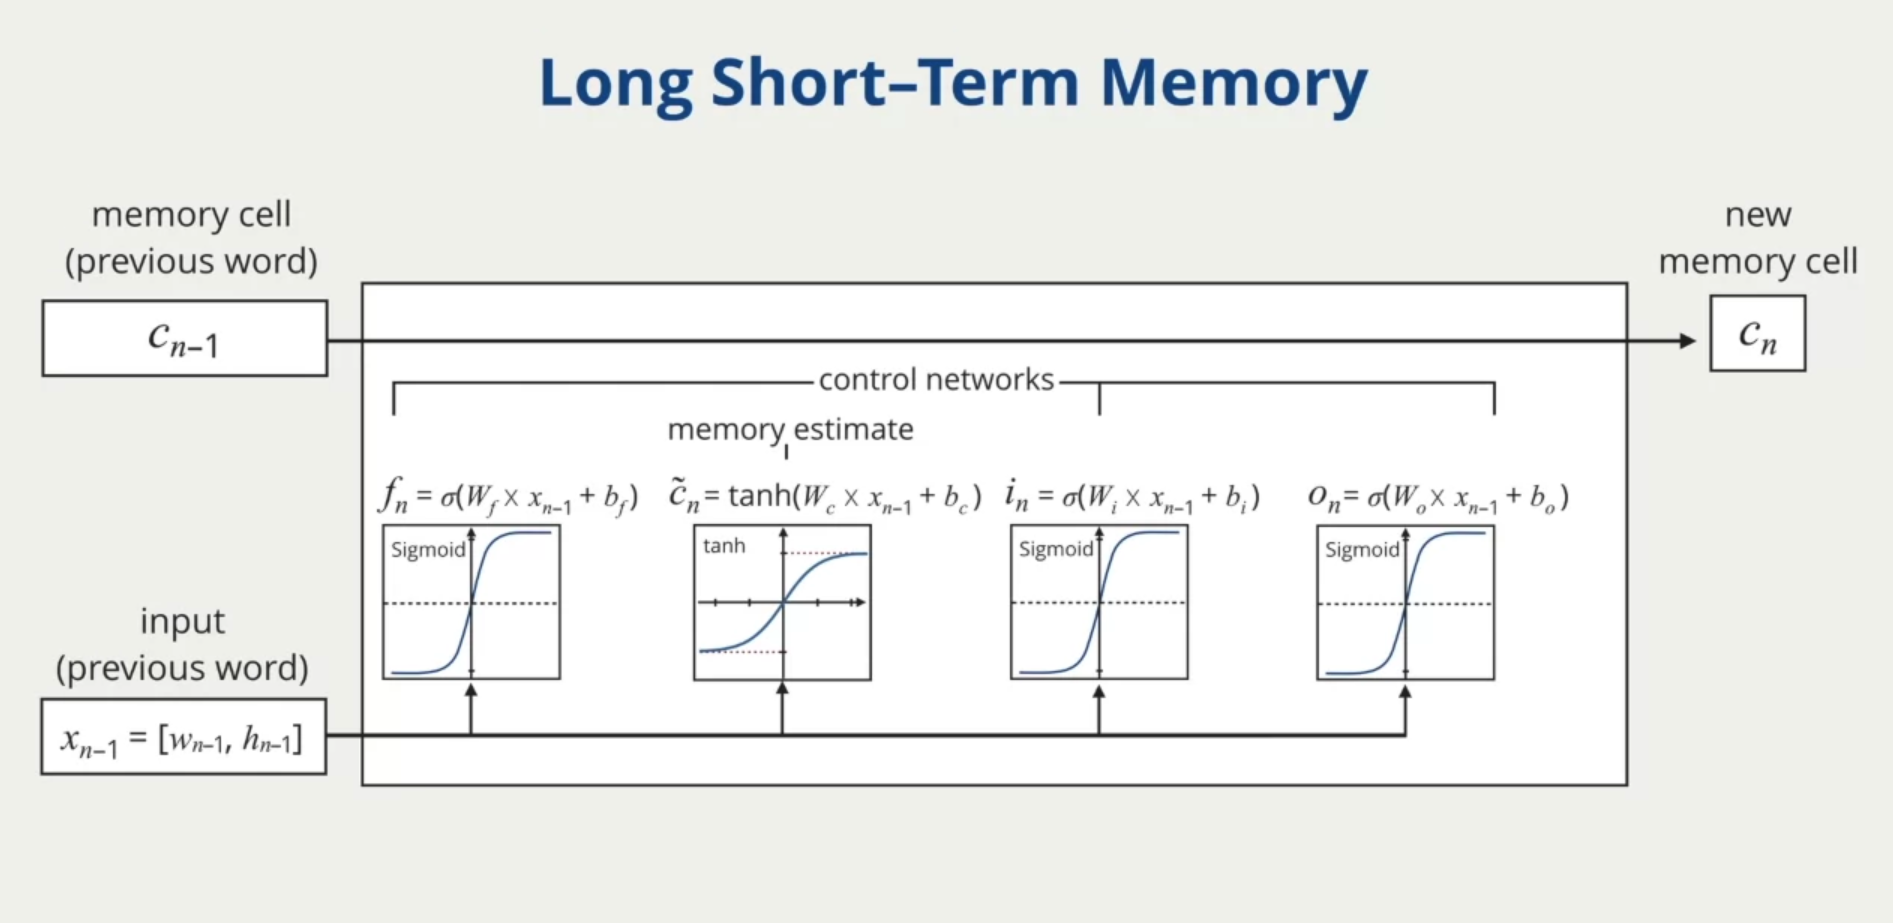

In [ ]:
from IPython.display import Image
Image('LSTM.png')

# Set up

In [1]:
import re
import nltk
import time
import math

import re 
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import pandas as pd
pd.options.mode.chained_assignment = None 

nltk.download('stopwords')

from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
import torch
import torchtext
import torch.nn.functional as F
from torch import optim
from torch import nn 

import gensim.downloader
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import math
from sklearn.linear_model import LinearRegression
import random

import psutil
import humanize
import os

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import GPUtil as GPU
import torchvision  
import torch.nn.functional as F  
import torchvision.datasets as datasets 
import torchvision.transforms as transforms  
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


from google.colab import drive
drive.mount('/content/drive')

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")    
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")
    

dict_size = 300000

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU is available


In [2]:
!pip3 install --upgrade gensim --user
W2V_model = gensim.downloader.load('word2vec-google-news-300')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
!pip3 install --upgrade gensim --user

#_glove_vectors = gensim.downloader.load('/content/drive/MyDrive/HW2DL/word2vec-google-news-300.model')

W2V_model = KeyedVectors.load('/content/drive/MyDrive/HW2DL/word2vec-google-news-300.model', mmap='r')
if not W2V_model:
  print("Downloading")
  W2V_model = gensim.downloader.load('word2vec-google-news-300')

In [ ]:

GPUs = GPU.getGPUs()
gpu = GPUs[0] # Only one GPU on Colab and isn’t guaranteed

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free:", humanize.naturalsize(psutil.virtual_memory().available ), "I Proc size: ", humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))


printm()

Gen RAM Free: 20.5 GB I Proc size:  7.8 GB
GPU RAM Free: 4313MB | Used: 11967MB | Util  74% | Total 16280MB


# **Actividad 1**

## Word2Vec

In [ ]:
!pip3 install --upgrade gensim --user
W2V_model = gensim.downloader.load('word2vec-google-news-300')

## Vector asociado ”king”, ”queen” y ”ball”

In [ ]:
_words = ["king", "queen", "ball"]

for _word in _words:
  _word_vector = W2V_model[_word]
  print("embedding for ", _word)
  print("size of embedding: ", len(_word_vector))
  print("-"*50)
  print(_word_vector, "\n")

embedding for  king
size of embedding:  300
--------------------------------------------------
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223

In [ ]:
for i in _words:
  print("\n")
  for j in reversed(_words):
    cosine_dist = W2V_model.distance(i, j) 
    euclidean_dist = np.linalg.norm(W2V_model[i] - W2V_model[j])
    print("Distance between   ", i, "|", j)
    print("Cosine: ", cosine_dist, "\nEuclidean: ", euclidean_dist, "\n")




Distance between    king | ball
Cosine:  0.9087690785527229 
Euclidean:  4.1938615 

Distance between    king | queen
Cosine:  0.3489043116569519 
Euclidean:  2.4796925 

Distance between    king | king
Cosine:  0.0 
Euclidean:  0.0 



Distance between    queen | ball
Cosine:  0.8758651316165924 
Euclidean:  4.195428 

Distance between    queen | queen
Cosine:  0.0 
Euclidean:  0.0 

Distance between    queen | king
Cosine:  0.3489043116569519 
Euclidean:  2.4796925 



Distance between    ball | ball
Cosine:  5.960464477539063e-08 
Euclidean:  0.0 

Distance between    ball | queen
Cosine:  0.8758651316165924 
Euclidean:  4.195428 

Distance between    ball | king
Cosine:  0.9087690785527229 
Euclidean:  4.1938615 



La magnitud de un vector de palabras es menos importante que su dirección; se puede considerar que la magnitud representa la frecuencia de uso, independientemente de la semántica de la palabra. Aquí nos interesa la semántica, así que normalizamos nuestros vectores, dividiendo cada uno por su longitud. El resultado es que todos nuestros vectores de palabras tienen una longitud de 1, y como tal, se encuentran en un círculo unitario. El producto punto de dos vectores es proporcional al coseno del ángulo entre ellos, y proporciona una medida de similitud (cuanto mayor sea el coseno, menor será el ángulo).

Normalmente, se mide la distancia entre dos vectores de word2vec utilizando la distancia coseno (véase similitud coseno), que mide el ángulo entre los vectores. En cambio, WMD utiliza la distancia euclidiana. La distancia euclidiana entre dos vectores puede ser grande porque sus longitudes difieren, pero la distancia coseno es pequeña porque el ángulo entre ellos es pequeño; podemos mitigar algo de esto normalizando los vectores.






##  ¿Tienen sentido?

Veamos una visualización para entender que significan estas distancias.
Usaremos un modelo TSNE y plotearemos los puntos. Primero veamos 300 palabras presentes en el vocabulario y representadas en un espacio vectorial.


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


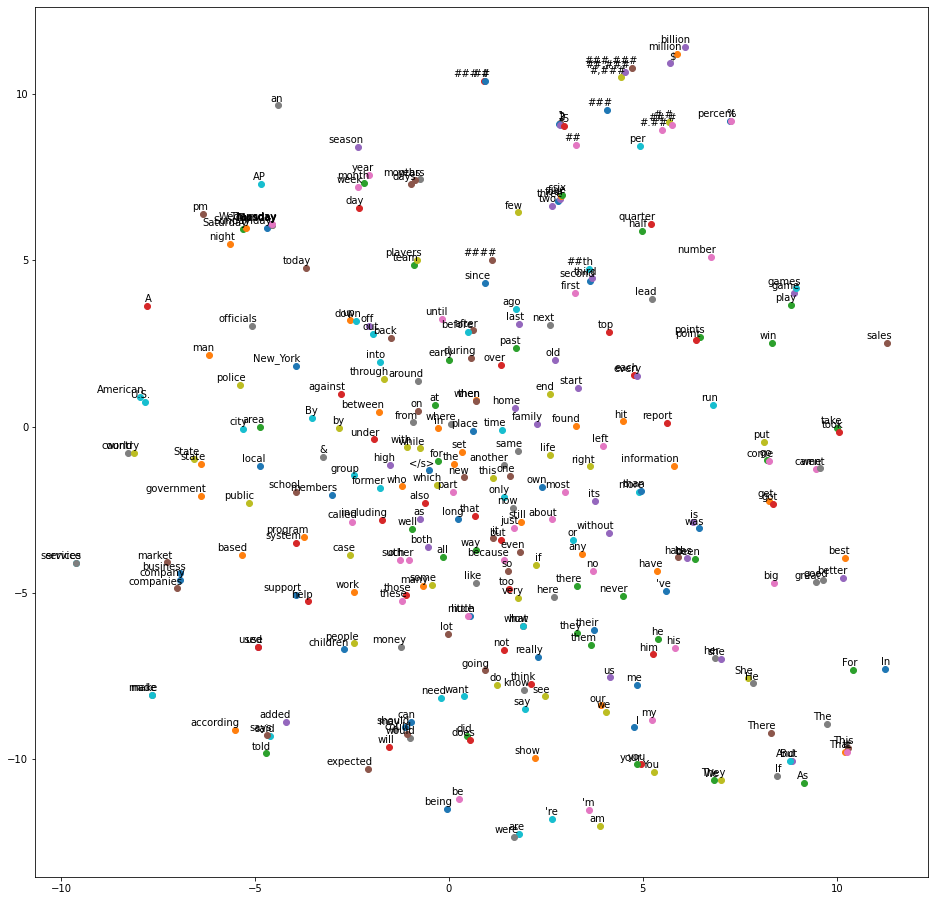

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

def tsne_plot(model):
  "Creates and TSNE model and plots it"
  labels = []
  tokens = []
  _typee = str(type(model))

  if "KeyedVectors" in _typee:
    for word in list(model.vocab):
      tokens.append(model[word])
      labels.append(word)

      if len(tokens) > 300:
        break

  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(tokens)

  x = []
  y = []
  for value in new_values:
      x.append(value[0])
      y.append(value[1])
      
  plt.figure(figsize=(16, 16)) 
  for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
  plt.show()

tsne_plot(W2V_model)

Ahora "king", "queen" y "ball" y sus palabras similares

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


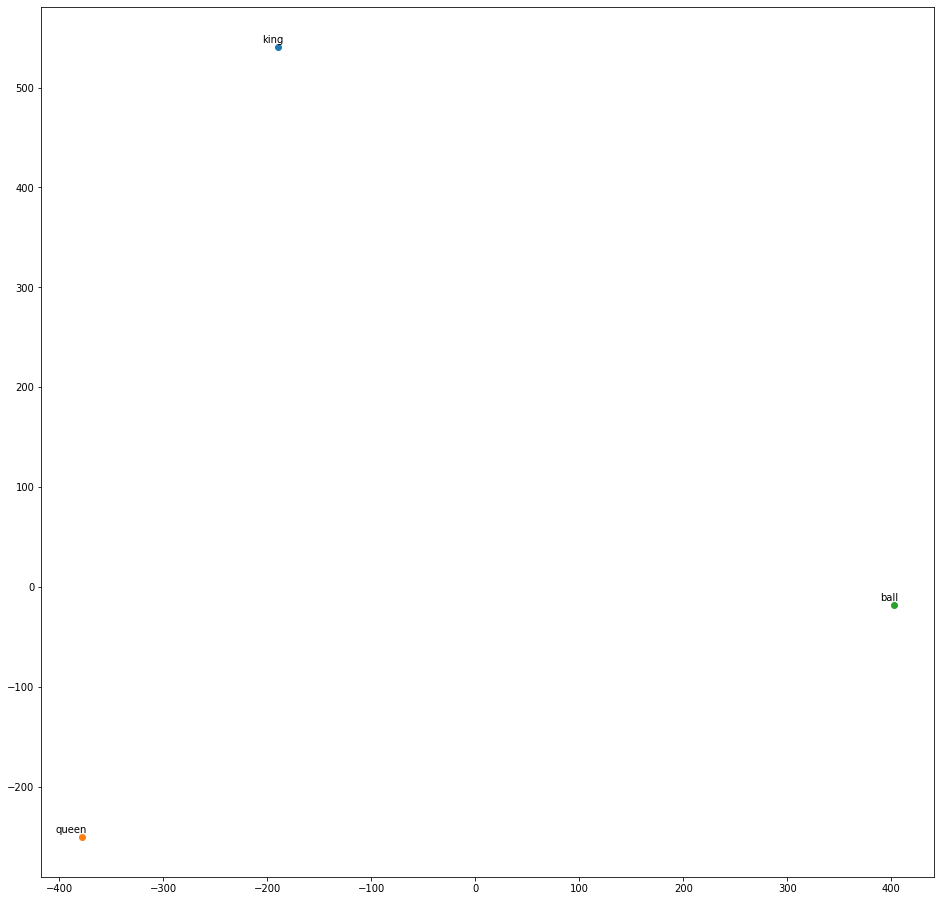

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in _words:
        tokens.append(model[word])
        labels.append(word)

        if len(tokens) > 300:
          break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(W2V_model)

Veamos palabras similares en el gráfico

In [ ]:
for _word in _words:
  print(W2V_model.most_similar(_word))

[('kings', 0.7138046026229858), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864822864532471), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.543294370174408), ('throne', 0.5422104597091675)]
[('queens', 0.739944338798523), ('princess', 0.7070531845092773), ('king', 0.6510956883430481), ('monarch', 0.6383601427078247), ('very_pampered_McElhatton', 0.6357026100158691), ('Queen', 0.6163407564163208), ('NYC_anglophiles_aflutter', 0.6060680150985718), ('Queen_Consort', 0.592379629611969), ('princesses', 0.5908075571060181), ('royal', 0.5637185573577881)]
[('balls', 0.6992625594139099), ('upfield', 0.6896207928657532), ('downfield', 0.6390728950500488), ('dribbler', 0.6218727827072144), ('balll', 0.6199932098388672), ('dribble', 0.616877555847168), ('ball_squirted', 0.6110137701034546), ('leftfooted', 0.6020259857177734), ('puck', 0.5981724262237549), ('

[('queens', 0.739944338798523), ('princess', 0.7070531845092773), ('king', 0.6510956883430481), ('monarch', 0.6383601427078247), ('very_pampered_McElhatton', 0.6357026100158691), ('Queen', 0.6163407564163208), ('NYC_anglophiles_aflutter', 0.6060680150985718), ('Queen_Consort', 0.592379629611969), ('princesses', 0.5908075571060181), ('royal', 0.5637185573577881)]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


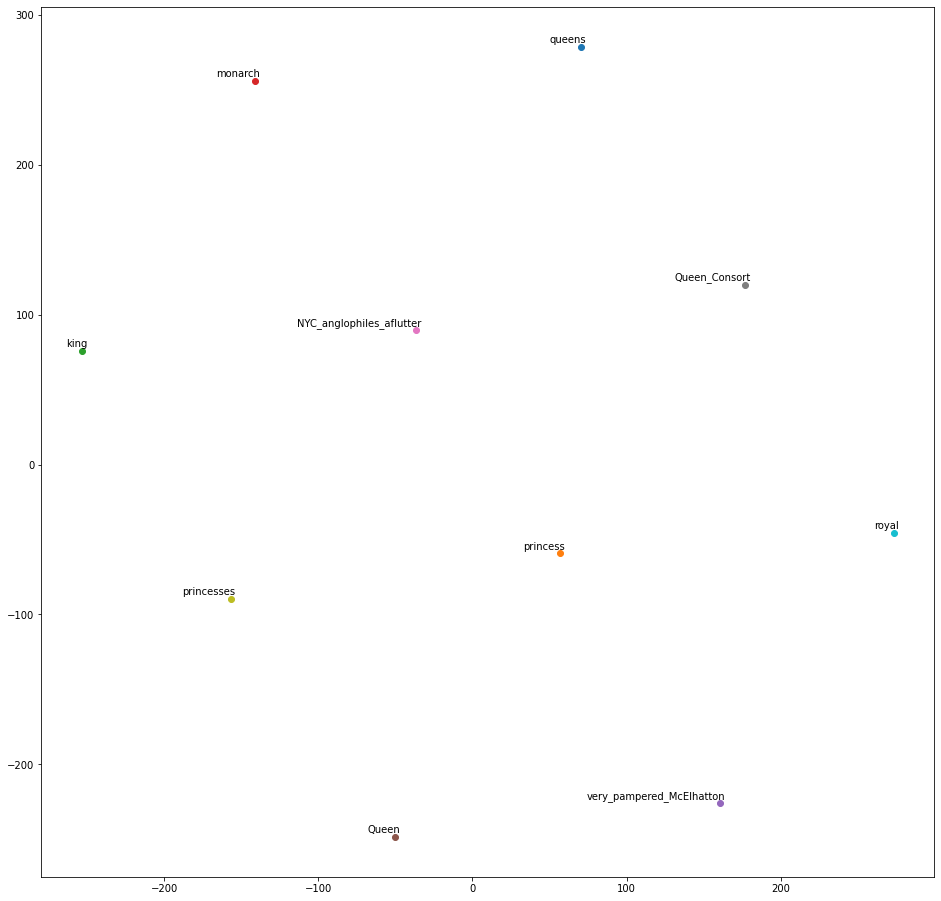

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []


    closest = model.most_similar("queen")
    print(closest)
    for tuple_ in closest:
      __word = tuple_[0]
      tokens.append(model[__word])
      labels.append(__word)

      if len(tokens) > 300:
        break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(W2V_model)

 ¿Tienen sentido?. Para explicar sus resultados una buena idea es analizar matemáticamente la distancia euclidiana y la similitud de coseno, y revisar que indican valores bajos y altos de cada una de estas métricas.
 
Tanto la similitud del coseno como la distancia euclidiana son métodos para medir la proximidad entre vectores en un espacio vectorial. Por tanto, es importante que definamos a qué nos referimos con la distancia entre dos vectores, ya que, como veremos en breve, esto no es precisamente obvio.

Los vectores cuya distancia euclidiana es pequeña tienen una "riqueza" similar; mientras que los vectores cuya similitud del coseno es alta parecen versiones a escala del otro.


# Actividad 2



Test balanceado i.e. la distribución de las clases debe mantenerse en las muestras para set de train, test y val.

In [ ]:
def get_mean_vector(words):
  # Handle empty ones
  valid = []

  for _word in words:
    try:
      _vector = W2V_model[_word]
      valid.append(_vector)
    except:
      _vector = np.zeros(300)
      valid.append(_vector)
      
  return np.mean(valid, axis=0)


In [ ]:
plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = plain_text.lower().split()
print(plain_text_no_spaces)

mean_vector = get_mean_vector(plain_text_no_spaces)
print("size", len(mean_vector))
print(mean_vector)


['its', 'dangerous', 'to', 'go', 'alone', 'take', 'this', 'its', 'a', 'secret', 'to', 'everybody', 'grumble', 'grumble', 'dodongo', 'dislikes', 'smoke', 'hey', 'listen']
size 300
[ 0.04865787  0.02505654  0.03553852  0.10970106 -0.08812192 -0.01562179
  0.03757196 -0.04190867  0.05398881  0.07464208 -0.06654438 -0.07063374
  0.03379099 -0.0012207  -0.12271439  0.0840181   0.10899915  0.04340724
  0.03820158 -0.0614608  -0.07549728  0.05103824  0.01945415  0.00904605
  0.05553436  0.01288484  0.01399954  0.00066336 -0.01787848 -0.0301867
 -0.0187924   0.01340846 -0.08647718 -0.03448506  0.04839646 -0.08915992
  0.05803229 -0.01402363  0.01752351  0.0610721   0.07733154 -0.11315677
  0.1087518  -0.01529573 -0.05909488 -0.01380117 -0.11972046  0.02934827
 -0.04902328  0.02143699 -0.03758481  0.0547903   0.03808594  0.00683493
 -0.00264218 -0.01442437 -0.05051583 -0.07716932  0.06632273 -0.01468699
  0.02247861  0.07275872 -0.03664519 -0.03865132  0.02806653 -0.08992727
 -0.04857756  0.047

Ahora crearemos las particiones del dataset

In [ ]:
SPAM_MSGS_path = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/SMSSpamCollection'
with open(SPAM_MSGS_path) as file:
  data = file.readlines()
  
len(data) # Vemos cuantos mensajes hay

df = pd.DataFrame(data=data).T
df.head()

0     \
0  ham\tGo until jurong point, crazy.. Available ...   

                                   1     \
0  ham\tOk lar... Joking wif u oni...\n   

                                                2     \
0  spam\tFree entry in 2 a wkly comp to win FA Cu...   

                                                3     \
0  ham\tU dun say so early hor... U c already the...   

                                                4     \
0  ham\tNah I don't think he goes to usf, he live...   

                                                5     \
0  spam\tFreeMsg Hey there darling it's been 3 we...   

                                                6     \
0  ham\tEven my brother is not like to speak with...   

                                                7     \
0  ham\tAs per your request 'Melle Melle (Oru Min...   

                                                8     \
0  spam\tWINNER!! As a valued network customer yo...   

                                                9     ...  \
0  spam\tHad your mobile 11 months or more? U R e...  ...   

                                                5564  \
0  ham\tOk lor... Sony ericsson salesman... I ask...   

                         5565  \
0  ham\tArd 6 like dat lor.\n   

                                                5566                 5567  \
0  ham\tWhy don't you wait 'til at least wednesda...  ham\tHuh y lei...\n   

                                                5568  \
0  spam\tREMINDER FROM O2: To get 2.50 pounds fre...   

                                                5569  \
0  spam\tThis is the 2nd time we have tried 2 con...   

                                          5570  \
0  ham\tWill ü b going to esplanade fr home?\n   

                                                5571  \
0  ham\tPity, * was in mood for that. So...any ot...   

                                                5572  \
0  ham\tThe guy did some bitching but I acted lik...   

                                5573  
0  ham\tRofl. Its true to its name\n  

[1 rows x 5574 columns]

## Limpiar mensajes, taggear segun spam o no spam

In [ ]:
import re 

SPAM = []
not_SPAM = []

for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  if tag == "spam":
    SPAM.append([_msg, tag])

  elif tag == "ham":
    not_SPAM.append([_msg, tag])

  else:
    print("ERROR - UNKNOWN MESSAGE")




In [ ]:
no_SPAM_df = pd.DataFrame(data=not_SPAM, columns=["message", "label"])
no_SPAM_df.index = no_SPAM_df.index + 1
no_SPAM_df.head()

message label
1  Go until jurong point crazy Available only in ...   ham
2                           Ok lar Joking wif u oni    ham
3       U dun say so early hor U c already then say    ham
4  Nah I don t think he goes to usf he lives arou...   ham
5  Even my brother is not like to speak with me T...   ham

In [ ]:
SPAM_df = pd.DataFrame(data=SPAM, columns=["message", "label"])
SPAM_df.index = SPAM_df.index + 1
SPAM_df.head()

message label
1  Free entry in 2 a wkly comp to win FA Cup fina...  spam
2  FreeMsg Hey there darling it s been 3 week s n...  spam
3  WINNER As a valued network customer you have b...  spam
4  Had your mobile 11 months or more U R entitled...  spam
5  SIX chances to win CASH From 100 to 20 000 pou...  spam

In [ ]:
len_spam = len(SPAM_df)
len_not_spam = len(no_SPAM_df)

print("How many spam messages ? -----", len_spam)
print("How many non spam messages ? -----", len_not_spam)
print("Meaning every 1 spam we have", len_not_spam // len_spam, "non spams")

How many spam messages ? ----- 747
How many non spam messages ? ----- 4827
Meaning every 1 spam we have 6 non spams


In [ ]:
print("How many spam messages ? -----", len(SPAM))
print("How many non spam messages ? -----", len(not_SPAM))

How many spam messages ? ----- 747
How many non spam messages ? ----- 4827


In [ ]:
SPAM_df.tail()

message label
743  Want explicit SEX in 30 secs Ring 02073162414 ...  spam
744  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...  spam
745  Had your contract mobile 11 Mnths Latest Motor...  spam
746  REMINDER FROM O2 To get 2 50 pounds free call ...  spam
747  This is the 2nd time we have tried 2 contact u...  spam

## Split train (70%) val (20%) test (10%)

Creamos particiones balanceadas i.e. la distribución de las clases se mantiene en las muestras para set de train, test y val.

In [ ]:
SPAM_train_df = SPAM_df[0:523]
SPAM_val_df = SPAM_df[523:672]
SPAM_test_df = SPAM_df[672:]


l_train_sp = len(SPAM_train_df)
l_val_sp = len(SPAM_val_df)
l_test_sp = len(SPAM_test_df)
print("SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_sp,
                                                                l_val_sp,
                                                                l_test_sp
                                                                ))

NOT_SPAM_train_df = no_SPAM_df[:3378]
NOT_SPAM_val_df = no_SPAM_df[3378:4344]
NOT_SPAM_test_df = no_SPAM_df[4344:]

l_train_ns = len(NOT_SPAM_train_df)
l_val_ns = len(NOT_SPAM_val_df)
l_test_ns = len(NOT_SPAM_test_df)

print("NOT SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_ns,
                                                                l_val_ns,
                                                                l_test_ns
                                                                ))

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483


In [ ]:
TRAIN_DB = pd.concat([SPAM_train_df, NOT_SPAM_train_df], ignore_index=True)
VAL_DB = pd.concat([SPAM_val_df, NOT_SPAM_val_df], ignore_index=True)
TEST_DB = pd.concat([SPAM_test_df, NOT_SPAM_test_df], ignore_index=True)



In [ ]:
TRAIN_DB_VECTORIAL = TRAIN_DB
VAL_DB_VECTORIAL = VAL_DB
TEST_DB_VECTORIAL = TEST_DB

Finalmente crear el embedding promedio de cada frase en cada db. Luego de esto estamos listos con el preprocesamiento de nuestra data y podemos proceder a los modelos

In [ ]:
TRAIN_DB_VECTORIAL['message'] = TRAIN_DB_VECTORIAL['message'].apply(get_mean_vector)


In [ ]:
TRAIN_DB_VECTORIAL.head()

message label
0  [-0.07759074421672078, 0.048100459111201296, 0...  spam
1  [-0.10761228749449823, 0.06816015109209947, 0....  spam
2  [-0.078173100553601, 0.06332680405370447, 0.01...  spam
3  [-0.10509731895045231, 0.08301504034745066, -0...  spam
4  [-0.06532968374399038, 0.043336134690504804, 0...  spam

In [ ]:
TRAIN_DB_VECTORIAL.to_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TRAIN_DB_VECTORIAL.pkl")


In [ ]:
TEST_DB_VECTORIAL['message'] = TEST_DB_VECTORIAL['message'].apply(get_mean_vector)
VAL_DB_VECTORIAL['message'] = VAL_DB_VECTORIAL['message'].apply(get_mean_vector)

In [ ]:
TEST_DB_VECTORIAL.head()

message label
0  [-0.06926125919117647, 0.061213055778952204, 0...  spam
1  [-0.10112105075668239, 0.0509749118636989, 0.0...  spam
2  [-0.083666264616101, 0.05175013257967715, 0.00...  spam
3  [-0.10302493446751644, 0.05586483604029605, 0....  spam
4  [-0.07908436949823944, 0.04044094891615317, 0....  spam

In [ ]:
VAL_DB_VECTORIAL.head()

message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...  spam
1  [-0.09061039719626168, 0.07018985926547897, -0...  spam
2  [-0.06800631009615385, 0.06438176081730769, 0....  spam
3  [-0.09761258638822115, 0.0676532451923077, 0.0...  spam
4  [-0.08366025727370689, 0.06141483701508621, 0....  spam

## Save pickle

In [ ]:
VAL_DB_VECTORIAL.to_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/VAL_DB_VECTORIAL.pkl")
TEST_DB_VECTORIAL.to_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TEST_DB_VECTORIAL.pkl")

## Read pickled data
Partir aquí para saltarse el proceso de armas DBs

In [ ]:
read_TEST_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TEST_DB_VECTORIAL.pkl")
read_TRAIN_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TRAIN_DB_VECTORIAL.pkl")
read_VAL_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/VAL_DB_VECTORIAL.pkl")

print("TRAIN")
print(read_TRAIN_DB_VECTORIAL.head())
print(len(read_TRAIN_DB_VECTORIAL), "\n")

print("TEST")
print(read_TEST_DB_VECTORIAL.head())
print(len(read_TEST_DB_VECTORIAL), "\n")

print("VAL")
print(read_VAL_DB_VECTORIAL.head())
print(len(read_VAL_DB_VECTORIAL))

TRAIN
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...  spam
1  [-0.10761228749449823, 0.06816015109209947, 0....  spam
2  [-0.078173100553601, 0.06332680405370447, 0.01...  spam
3  [-0.10509731895045231, 0.08301504034745066, -0...  spam
4  [-0.06532968374399038, 0.043336134690504804, 0...  spam
3901 

TEST
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...  spam
1  [-0.10112105075668239, 0.0509749118636989, 0.0...  spam
2  [-0.083666264616101, 0.05175013257967715, 0.00...  spam
3  [-0.10302493446751644, 0.05586483604029605, 0....  spam
4  [-0.07908436949823944, 0.04044094891615317, 0....  spam
558 

VAL
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...  spam
1  [-0.09061039719626168, 0.07018985926547897, -0...  spam
2  [-0.06800631009615385, 0.06438176081730769, 0....  spam
3  [-0.09761258638822115, 0.

Guardamos para tenerlos listos en caso de que se caiga el proceso. 

Pasamos a GPU.

# **Actividad 3**


## Arquitecturas

### RNN

In [8]:
# Hyperparameters
input_size = 300
hidden_size = 80
num_layers = 1
num_classes = 2
sequence_length = 300
learning_rate = 0.005
batch_size = 2
num_epochs = 3

"""

RNN_CUSTOM(
  (embedding): Embedding(300000, 300)
  (rnn): RNN(300, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)
"""

class RNN_CUSTOM(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
    super(RNN_CUSTOM, self).__init__()
    # Set up
    self.device = device
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    # Embedding
    self.embedding = nn.Embedding(300000, input_size)

    # RNN
    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
    self.fc = nn.Linear(hidden_dim, output_size)

    # SoftMax opcional
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, x):
    # print("SHAPE", x.shape)
    x = self.embedding(x)
    hidden = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(self.device)
    out, hidden = self.rnn(x[:,:,0,:], hidden)
    # print("SHAPE", out.shape)
    out = out.contiguous().view(-1, self.hidden_dim)
    # print("SHAPE", out.shape)
    out = self.fc(out)
    out = self.softmax(out)
    return out, hidden.to(self.device)

### GRU

In [9]:
# Hyperparameters
input_size = 300
hidden_size = 80
num_layers = 1
num_classes = 2
sequence_length = 300
learning_rate = 0.005
batch_size = 2
num_epochs = 3
"""

GRU_CUSTOM(
  (embedding): Embedding(300000, 300)
  (rnn): RNN(300, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

"""

class GRU_CUSTOM(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
    super(GRU_CUSTOM, self).__init__()

    # Set up
    self.device = device
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    # Embedding
    self.embedding = nn.Embedding(300000, input_size)

    # GRU
    self.rnn = nn.GRU(input_size, hidden_dim, n_layers, batch_first=True)   
    self.fc = nn.Linear(hidden_dim, output_size)

    # SoftMax opcional
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, x):
    # print("SHAPE", x.shape)
    x = self.embedding(x)
    hidden = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(self.device)
    out, hidden = self.rnn(x[:,:,0,:], hidden)
    # print("SHAPE", out.shape)
    out = out.contiguous().view(-1, self.hidden_dim)
    # print("SHAPE", out.shape)
    out = self.fc(out)
    out = self.softmax(out)
    return out, hidden.to(self.device)

# Model Instance

GRU_INSTANCE = GRU_CUSTOM(input_size=300, output_size=2, hidden_dim=80, n_layers=1, device = device)
GRU_INSTANCE = GRU_INSTANCE.to(device)
n_epochs = 150
lr = 0.0015
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(GRU_INSTANCE.parameters(), lr=lr)

### LSTM

In [10]:
"""

CUSTOM_LSTM(
  (embedding): Embedding(300000, 300)
  (lstm): LSTM(300, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

"""


class CUSTOM_LSTM(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
    super(CUSTOM_LSTM, self).__init__()
    # Set up
    self.device = device
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers
    # Embedding
    self.embedding = nn.Embedding(300000, input_size)

    # LSTM / Softmax opcional
    self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_size)
    self.softmax = nn.Softmax(dim=-1)
      
  def initHiddenCell(self, x):
    hidden = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(self.device)
    rand_cell = torch.zeros(2, batch_size, self.hidden_dim)
    return hidden, rand_cell
    
  def forward(self, x):
    x = self.embedding(x)
    # Hidden cell
    h, c = self.initHiddenCell(x[:,:,0,:])

    out, (h, c) = self.lstm(x[:,:,0,:], (h,c))
    out = out.contiguous().view(-1, self.hidden_dim)
    out = self.fc(out)
    out = self.softmax(out)
    return out, (h.to(self.device),c.to(self.device))

# Model Instance

LSTM_INSTANCE = CUSTOM_LSTM(input_size=300, output_size=2, hidden_dim=80, n_layers=1, device = device)
LSTM_INSTANCE = LSTM_INSTANCE.to(device)
n_epochs = 30
lr = 0.0015
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(LSTM_INSTANCE.parameters(), lr=lr)

### LSTM Bidirectional

In [ ]:
from scipy.spatial.distance import hamming
class CUSTOM_BI_LSTM(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
    super(CUSTOM_BI_LSTM, self).__init__()
      # Set up
    self.device = device
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    # Embedding
    self.embedding = nn.Embedding(dict_size, input_size)

      # LSTM / Softmax opcional
    self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True, bidirectional=True)
    self.fc = nn.Linear(hidden_dim, output_size)
    self.softmax = nn.Softmax(dim=-1)

  def initHiddenCell(self, batch_size):
    hidden = torch.zeros(2, batch_size, self.hidden_dim)
    rand_cell = torch.zeros(2, batch_size, self.hidden_dim)
    return hidden, rand_cell

  def forward(self, x):
    # https://www.kaggle.com/code/mlwhiz/bilstm-pytorch-and-keras/notebook
    x = self.embedding(x)
    h, c = self.initHiddenCell(x[:,:,0,:].size(0))
    out, (h, c) = self.lstm(x[:,:,0,:], (h, c))
    out = out.contiguous().view(-1, self.hidden_dim)

    out = self.fc(out)
    out = self.softmax(out)
    
    return out, (h.to(self.device),c.to(self.device))

# **Actividad 4**
Entrene todas las redes neuronales mencionadas anteriormente. 

## Utils - Helper functions

In [824]:
# Average vector of phrase
def get_mean_vector(words):
  valid = []

  for _word in words:
    try:
      _vector = W2V_model[_word]
      valid.append(_vector)
    except:
      _vector = np.zeros(300)
      valid.append(_vector)
      
  return np.mean(valid, axis=0)
  

# Tensorize
def tensorize(X_train, y_train, X_test, y_test, X_val, y_val):
  RNN_sized_X_train, RNN_sized_y_train = _tensorize_dataset(X_train, y_train)
  RNN_sized_X_val, RNN_sized_y_val = _tensorize_dataset(X_val, y_val)
  RNN_sized_X_test, RNN_sized_y_test = _tensorize_dataset(X_test, y_test)
  
  return RNN_sized_X_train, RNN_sized_y_train, RNN_sized_X_test, RNN_sized_y_test, RNN_sized_X_val, RNN_sized_y_val

# Data loaders
def _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device):
  X_train, y_train, X_test, y_test, X_val, y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)


  X_train = X_train.to(device)
  y_train = y_train.to(device)

  #X_test = X_test.to(device)
  #y_test = y_test.to(device)

  X_val = X_val.to(device)
  y_val = y_val.to(device)

  train_data = TensorDataset(X_train, y_train)
  train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
  val_data = TensorDataset(X_val, y_val)
  val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
  
  return train_loader, val_loader


# All in one plots
def _plot(x, y, _set_="Train", measure="Loss", log=False, color="blue"):
  plt.figure(figsize=(9,9))
  plt.plot(x, y, color = color)
  title = _set_ + " " + measure + " per epoch"
  plt.legend([title], loc='upper left')

  if log:
    plt.yscale('log')
  
  plt.show()

# Bring list of tensors into cpu
def _bring_to_cpu(list_vectors):
  list_ints = []

  for i in range(len(list_vectors)):
    curr_ = list_vectors[i]
    curr_ = curr_.item()
    list_ints.append(curr_)

  return list_ints


# Training loop - Returns stats
def training_loop(train_loader, val_loader, model, n_epochs, lr = 0.0015):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  # Logs
  epochs_ = []
  loss_by_epoch = []
  loss_by_epoch_val = []

  train_precision = []
  val_precision = []

  for epoch in range(1, n_epochs + 1):
    running_loss = 0
    curr_epoch_train_accuracy = 0
    curr_epoch_val_accuracy = 0
    curr_epoch_total_info = 0
    curr_epoch_total_info_val = 0
    curr_epoch_train_loss = 0
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
      start = time.time()
      model.train()
      optimizer.zero_grad()

      # Forward pass
      output_train, _ = model(data)
      targets = targets.view(-1).long()

      # Backward pass
      loss_train = criterion(output_train, targets)
      loss_train.backward()
      optimizer.step()

      model.eval()
      predicted_y = _predict(output_train)
      precision_train = _accuracy(predicted_y, targets)

      curr_epoch_train_accuracy += precision_train
      curr_epoch_total_info +=len(data)


      # Metrics
      # Train metrics
      running_loss += loss_train.item()
      curr_epoch_train_loss += running_loss


      # Test metrics
      model.eval()
      x_val, y_val = next(iter(val_loader)) 
      output_val, _ = model(x_val)
      predicted_val = _predict(output_val)
      y_val = y_val.view(-1).long()
      precision_val = _accuracy(predicted_val, y_val)
      curr_epoch_val_accuracy += precision_val
      curr_epoch_total_info_val += len(x_val)

    train_loss.append(curr_epoch_train_loss)
    # Totals
    val_precision.append(curr_epoch_val_accuracy/curr_epoch_total_info_val)
    train_precision.append(curr_epoch_train_accuracy/curr_epoch_total_info)
    loss_by_epoch.append(loss_train)
    epochs_.append(epoch)

    # Log
    print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
    print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')


  return {"epochs": epochs_, 
          "loss_by_epoch": loss_by_epoch, 
          "loss_by_epoch_val": loss_by_epoch_val,
          "train_precision": train_precision, 
          "val_precision": val_precision, 
          }


# Resize and create tensors from data
def _tensorize_dataset(features, labels):
  _sized_features = np.zeros((len(features), len(features[0]), 1), dtype=np.int64)
  for _feature in range(len(features)):
    for _idx in range(len(features[0])):
      _sized_features[_feature, _idx] = features[_feature][_idx]

  _sized_labels = np.zeros((len(labels), len(features[0])), dtype=np.float32)
  for _label in range(len(labels)):
    for _id in range(len(features[0])):
      _sized_labels[_label, _id] = labels[_label]

  _sized_features = torch.from_numpy(_sized_features)
  _sized_labels = torch.Tensor(_sized_labels)
  return (_sized_features, _sized_labels)


# Same detailed process of vectorizing but in one go
def _get_clean_data():
  SPAM_MSGS_path = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/SMSSpamCollection'

  with open(SPAM_MSGS_path) as file:
    data = file.readlines()

  df = pd.DataFrame(data=data).T
  SPAM = []
  not_SPAM = []

  for _msg in data:
    tag, _msg = _msg.strip().split('\t')
    _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
    if tag == "spam":
      SPAM.append([_msg, tag])

    elif tag == "ham":
      not_SPAM.append([_msg, tag])

    else:
      print("ERROR - UNKNOWN MESSAGE")

  no_SPAM_df = pd.DataFrame(data=not_SPAM, columns=["message", "label"])
  no_SPAM_df.index = no_SPAM_df.index + 1

  SPAM_df = pd.DataFrame(data=SPAM, columns=["message", "label"])
  SPAM_df.index = SPAM_df.index + 1

  SPAM_train_df = SPAM_df[0:523]
  SPAM_val_df = SPAM_df[523:672]
  SPAM_test_df = SPAM_df[672:]

  l_train_sp = len(SPAM_train_df)
  l_val_sp = len(SPAM_val_df)
  l_test_sp = len(SPAM_test_df)
  print("SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_sp,
                                                                  l_val_sp,
                                                                  l_test_sp
                                                                  ))
  NOT_SPAM_train_df = no_SPAM_df[:3378]
  NOT_SPAM_val_df = no_SPAM_df[3378:4344]
  NOT_SPAM_test_df = no_SPAM_df[4344:]

  l_train_ns = len(NOT_SPAM_train_df)
  l_val_ns = len(NOT_SPAM_val_df)
  l_test_ns = len(NOT_SPAM_test_df)

  print("NOT SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_ns,
                                                                  l_val_ns,
                                                                  l_test_ns
                                                                  ))

  TRAIN_DB = pd.concat([SPAM_train_df, NOT_SPAM_train_df], ignore_index=True)
  VAL_DB = pd.concat([SPAM_val_df, NOT_SPAM_val_df], ignore_index=True)
  TEST_DB = pd.concat([SPAM_test_df, NOT_SPAM_test_df], ignore_index=True)

  TRAIN_DB_VECTORIAL = TRAIN_DB
  VAL_DB_VECTORIAL = VAL_DB
  TEST_DB_VECTORIAL = TEST_DB

  TRAIN_DB_VECTORIAL['message'] = TRAIN_DB_VECTORIAL['message'].apply(get_mean_vector)
  TEST_DB_VECTORIAL['message'] = TEST_DB_VECTORIAL['message'].apply(get_mean_vector)
  VAL_DB_VECTORIAL['message'] = VAL_DB_VECTORIAL['message'].apply(get_mean_vector)

  TRAINDB_copy = TRAIN_DB_VECTORIAL
  TESTDB_copy = TEST_DB_VECTORIAL
  VAL_copy = VAL_DB_VECTORIAL

  TRAINDB_copy.loc[TRAINDB_copy['label'] == 'spam', 'label'] = 1
  TRAINDB_copy.loc[TRAINDB_copy['label'] == 'ham', 'label'] = 0

  TESTDB_copy.loc[TESTDB_copy['label'] == 'spam', 'label'] = 1
  TESTDB_copy.loc[TESTDB_copy['label'] == 'ham', 'label'] = 0

  VAL_copy.loc[VAL_copy['label'] == 'spam', 'label'] = 1
  VAL_copy.loc[VAL_copy['label'] == 'ham', 'label'] = 0


  print("- Test -")
  print(TESTDB_copy.head())
  print(len(TESTDB_copy), "\n")

  print("- Val -")
  print(VAL_copy.head())
  print(len(VAL_copy), "\n")

  print("- Train -")
  print(TRAINDB_copy.head())
  print(len(TRAINDB_copy), "\n")

  X_train = TRAINDB_copy["message"]
  y_train = TRAINDB_copy["label"]

  X_test = TESTDB_copy["message"]
  y_test = TESTDB_copy["label"]

  X_val = VAL_copy["message"]
  y_val = VAL_copy["label"]


  print("X train")
  print(type(X_train))
  print(len(X_train[0]))
  print(len(X_train), "\n")
  # print(X_train[0])

  print("Y train")
  print(len(y_train), "\n")

  print("X val")
  print(len(X_val), "\n")

  print("Y val")
  print(len(y_val), "\n")

  print("X test")
  print(len(X_test), "\n")

  print("Y test")
  print(len(y_test), "\n")


  print("-"*60)

  print("X_train\nsize:", len(X_train), "x", len(X_train[0]))
  print(X_train)
  print("\nFIRST ELEMENT\n","-"*30)
  print(X_train[0][:80])
  print("END ", "-"*50)
  print(type(X_train))

  return X_train, y_train, X_test, y_test, X_val, y_val


def _predict(output):
  _predictions = []
  for i in range(int(len(output)/300)):
    elemento = output[i*300:(i+1)*300]

    prediccion = 1
    if float(elemento[299][0]) >= float(elemento[299][1]):
      prediccion = 0

    _predictions.append(prediccion)
  return _predictions


def _accuracy(prediccion, label):
  return [1 if i==j else 0 for i, j in zip(prediccion,label)].sum()


def LOSS(feature_siam_1, feature_siam_2, y, m):
  total_loss = 0
  total_loss = torch.tensor(total_loss)
  total_loss.to(device)

  for i in range(len(feature_siam_1)):

    y_pos = float(y[i])
    feature_siam_1 = feature_siam_1[i]
    feature_siam_2 = feature_siam_2[i]
    dist = torch.norm(feature_siam_1 - feature_siam_2)

    loss = y_pos * dist + (1 - y_pos) * max(0, (m - dist))
    total_loss += loss
  
  total_loss = total_loss / len(feature_siam_1)

  return total_loss.to(device)


def MSE(feature_siam_1, feature_siam_2, score):
  msqerror = []
  y_bar = []

  for i in range(len(feature_siam_1)):
    msqerror.append(torch.norm(feature_siam_1[i] - feature_siam_2[i]))
    y_bar.append(math.exp(-(torch.norm(feature_siam_1[i] - feature_siam_2[i]))))

  y_bar = np.array(y_bar).reshape(-1,1)
  regresion_lineal = LinearRegression()
  regresion_lineal.fit(y_bar, np.array(score))

  MSE = 0
  MSE_ = 0
  for i in range(len(y_bar)):
    MSE += (score[i] - regresion_lineal.coef_[0]*y_bar[i] + regresion_lineal.intercept_)**2
    MSE_ += abs((score[i] - regresion_lineal.coef_[0]*y_bar[i] + regresion_lineal.intercept_)**2)
  
  MSE_ = MSE_ / len(y_bar)
  MSE = MSE / len(y_bar)

  return MSE, MSE_, regresion_lineal.coef_[0], regresion_lineal.intercept_


def _MSE(feature_siam_1, feature_siam_2, score, a, b):
  msqerror = []
  y_bar = []
  for i in range(len(feature_siam_1)):
    dist = torch.norm(feature_siam_1[i] - feature_siam_2[i])
    msqerror.append(dist)
    z.append(math.exp(-dist))

  y_bar = np.array(z).reshape(-1,1)

  MSE = 0
  MSE_ = 0
  for i in range(len(y_bar)):
    MSE += (score[i] - a * y_bar[i] + b)**2
    MSE_ = MSE_ + abs((score[i] - a * y_bar[i] + b)**2)
  
  MSE_ = MSE_ / len(y_bar)
  MSE = MSE / len(y_bar)

  return MSE, MSE_


## Benchmark Logistic

Solo para referencia, veamos cómo se comportaría un modelo logistico con esta data

Epoch: 1, Loss: 0.789348304271698, Accuracy: 13.406818389892578%
Epoch: 2, Loss: 0.7155246138572693, Accuracy: 13.406818389892578%
Epoch: 3, Loss: 0.6114693880081177, Accuracy: 86.54191589355469%
Epoch: 4, Loss: 0.4913495182991028, Accuracy: 86.56754302978516%
Epoch: 5, Loss: 0.3965016305446625, Accuracy: 86.56754302978516%
Epoch: 6, Loss: 0.37607982754707336, Accuracy: 86.59317779541016%
Epoch: 7, Loss: 0.4190985858440399, Accuracy: 86.59317779541016%
Epoch: 8, Loss: 0.45207667350769043, Accuracy: 86.59317779541016%
Epoch: 9, Loss: 0.4488135874271393, Accuracy: 86.59317779541016%
Epoch: 10, Loss: 0.42088019847869873, Accuracy: 86.59317779541016%
Epoch: 11, Loss: 0.3857569694519043, Accuracy: 86.59317779541016%
Epoch: 12, Loss: 0.35838428139686584, Accuracy: 86.59317779541016%
Epoch: 13, Loss: 0.34637385606765747, Accuracy: 86.59317779541016%
Epoch: 14, Loss: 0.3483676314353943, Accuracy: 86.59317779541016%
Epoch: 15, Loss: 0.3556857705116272, Accuracy: 86.59317779541016%
Epoch: 16, Lo

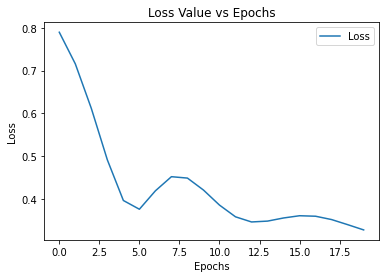

In [694]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(300, 100)
        self.linear2 = nn.Linear(100, 10)
        self.linear3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x


logisticModel = LogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=logisticModel.parameters() , lr=0.01)
epochs = 20
logisticModel.train()
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = logisticModel(torch.tensor(X_train).float())
    loss = criterion(y_pred, torch.tensor(y_train))
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(torch.tensor(y_train)).sum()
    acc = pred * 100.0 / len(X_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()


print("\n\n")
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()


# Entrenamientos

# Entrenamiento RNN

In [693]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [12]:
# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance

RNN_INSTANCE = RNN_CUSTOM(input_size=300, 
                          output_size=2, 
                          hidden_dim=80, 
                          n_layers=1, 
                          device = device)

RNN_INSTANCE = RNN_INSTANCE.to(device)
n_epochs = 60

# Training Loop Helper Function call
RNN_STATS = training_loop(train_loader, val_loader, RNN_INSTANCE, n_epochs)

100%|██████████| 61/61 [00:02<00:00, 20.40it/s]


Epoch: 1/60............. Loss Train Epoch: 0.4774............. 

100%|██████████| 61/61 [00:02<00:00, 22.12it/s]


Epoch: 2/60............. Loss Train Epoch: 0.3955............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 3/60............. Loss Train Epoch: 0.4118............. 

100%|██████████| 61/61 [00:03<00:00, 18.93it/s]


Epoch: 4/60............. Loss Train Epoch: 0.4609............. 

100%|██████████| 61/61 [00:02<00:00, 22.02it/s]


Epoch: 5/60............. Loss Train Epoch: 0.4281............. 

100%|██████████| 61/61 [00:02<00:00, 22.03it/s]


Epoch: 6/60............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:02<00:00, 22.10it/s]


Epoch: 7/60............. Loss Train Epoch: 0.3789............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 8/60............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 22.05it/s]


Epoch: 9/60............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 22.19it/s]


Epoch: 10/60............. Loss Train Epoch: 0.4117............. 

100%|██████████| 61/61 [00:02<00:00, 22.08it/s]


Epoch: 11/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.96it/s]


Epoch: 12/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.06it/s]


Epoch: 13/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.61it/s]


Epoch: 14/60............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 15/60............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:02<00:00, 22.07it/s]


Epoch: 16/60............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 22.09it/s]


Epoch: 17/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.20it/s]


Epoch: 18/60............. Loss Train Epoch: 0.3789............. 

100%|██████████| 61/61 [00:02<00:00, 21.83it/s]


Epoch: 19/60............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.97it/s]


Epoch: 20/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.99it/s]


Epoch: 21/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.01it/s]


Epoch: 22/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.71it/s]


Epoch: 23/60............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 22.01it/s]


Epoch: 24/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.86it/s]


Epoch: 25/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 26/60............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:02<00:00, 20.86it/s]


Epoch: 27/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 22.03it/s]


Epoch: 28/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.90it/s]


Epoch: 29/60............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 22.10it/s]


Epoch: 30/60............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 21.93it/s]


Epoch: 31/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.10it/s]


Epoch: 32/60............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 22.19it/s]


Epoch: 33/60............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 21.95it/s]


Epoch: 34/60............. Loss Train Epoch: 0.5592............. 

100%|██████████| 61/61 [00:02<00:00, 22.08it/s]


Epoch: 35/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.03it/s]


Epoch: 36/60............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:02<00:00, 22.06it/s]


Epoch: 37/60............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 22.09it/s]


Epoch: 38/60............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 22.17it/s]


Epoch: 39/60............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 22.25it/s]


Epoch: 40/60............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 22.09it/s]


Epoch: 41/60............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.98it/s]


Epoch: 42/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.22it/s]


Epoch: 43/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.05it/s]


Epoch: 44/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.13it/s]


Epoch: 45/60............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:02<00:00, 22.06it/s]


Epoch: 46/60............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 47/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 22.12it/s]


Epoch: 48/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 49/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.21it/s]


Epoch: 50/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.90it/s]


Epoch: 51/60............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 22.13it/s]


Epoch: 52/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.08it/s]


Epoch: 53/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.82it/s]


Epoch: 54/60............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 22.18it/s]


Epoch: 55/60............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:02<00:00, 22.13it/s]


Epoch: 56/60............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 22.10it/s]


Epoch: 57/60............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 22.15it/s]


Epoch: 58/60............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 22.04it/s]


Epoch: 59/60............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.98it/s]

Epoch: 60/60............. Loss Train Epoch: 0.4772............. 

## Save / Load model

In [ ]:
PATH = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/RNN_INSTANCE'
torch.save(RNN_INSTANCE.state_dict(), PATH)

In [ ]:
RNN_INSTANCE = RNN_CUSTOM(input_size=300, output_size=2, hidden_dim=80, n_layers=1, device = device)
RNN_INSTANCE = RNN_INSTANCE.to(device)
RNN_INSTANCE.load_state_dict(torch.load(PATH))
RNN_INSTANCE.eval()

RNN_CUSTOM(
  (embedding): Embedding(300000, 300)
  (rnn): RNN(300, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

## Gráfico 1: Train Loss en función de épocas


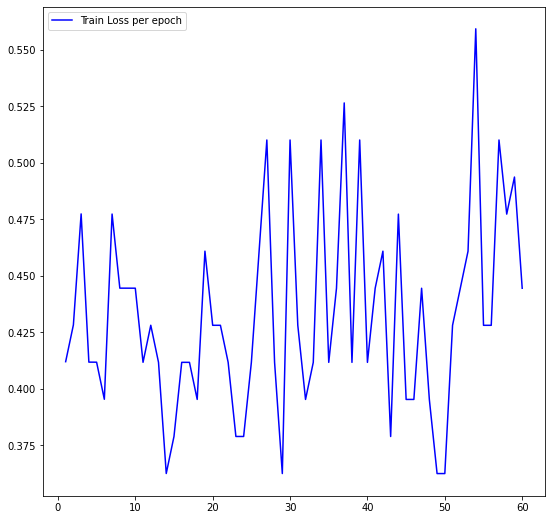

In [ ]:
x = RNN_STATS["epochs"]
y = _bring_to_cpu(RNN_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

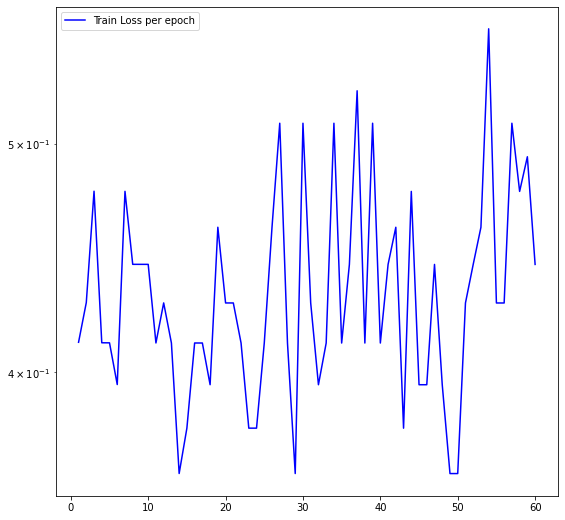

In [ ]:
x = RNN_STATS["epochs"]
y = _bring_to_cpu(RNN_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


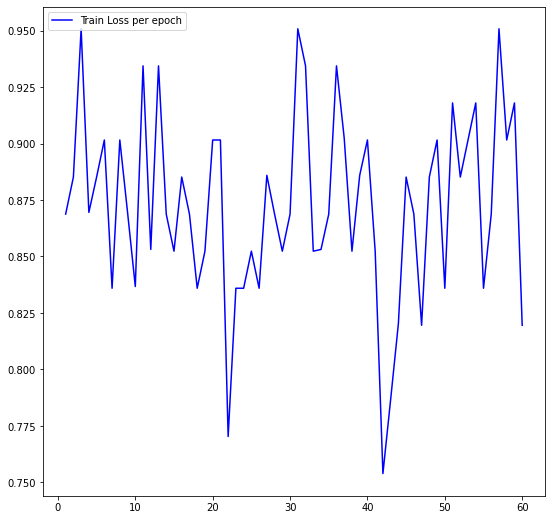

In [ ]:
x = RNN_STATS["epochs"]
y = RNN_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 4: Val Precision en función de épocas.



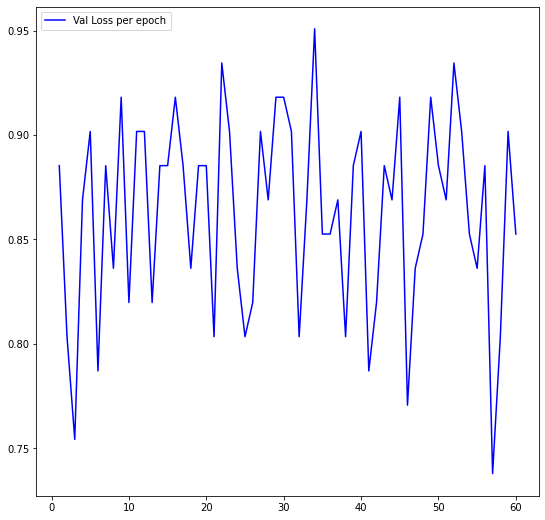

In [ ]:
x = RNN_STATS["epochs"]
y = RNN_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Loss")

## Desempeño de red en el test set

In [13]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [14]:
"""
Train

RNN_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

RNN_INSTANCE.eval()
output_val, _ = RNN_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


RNN_INSTANCE.eval()
output_test, _ = RNN_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


Vemos comportamientos similares en cada set.
Como sabemos que todos los set tienen la misma distribución de Spam / No Spam, podemos afirmar que **no hay overfitting**.

## Test mensajes fijos

In [15]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [ ]:
!!ls

In [16]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

RNN_INSTANCE.eval()
output_val, _ = RNN_INSTANCE(custom_msg_x_train)
print(output_val.shape)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

RNN_INSTANCE.eval()
output_val, _ = RNN_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

torch.Size([600, 2])
message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento GRU

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [ ]:
# Model Instance

# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device)

GRU_INSTANCE = GRU_CUSTOM(input_size=300, output_size=2, hidden_dim=80, n_layers=1, device = device)
GRU_INSTANCE = GRU_INSTANCE.to(device)
n_epochs = 90
lr = 0.0015
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(GRU_INSTANCE.parameters(), lr=lr)

# Training Loop Helper Function call
GRU_STATS = training_loop(train_loader, val_loader, GRU_INSTANCE, n_epochs)

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 1/90............. Loss Train Epoch: 0.4446............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 2/90............. Loss Train Epoch: 0.4118............. 

100%|██████████| 61/61 [00:02<00:00, 21.20it/s]


Epoch: 3/90............. Loss Train Epoch: 0.3954............. 

100%|██████████| 61/61 [00:02<00:00, 21.17it/s]


Epoch: 4/90............. Loss Train Epoch: 0.4773............. 

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 5/90............. Loss Train Epoch: 0.3625............. 

100%|██████████| 61/61 [00:02<00:00, 21.12it/s]


Epoch: 6/90............. Loss Train Epoch: 0.4445............. 

100%|██████████| 61/61 [00:02<00:00, 21.22it/s]


Epoch: 7/90............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:02<00:00, 21.19it/s]


Epoch: 8/90............. Loss Train Epoch: 0.4117............. 

100%|██████████| 61/61 [00:02<00:00, 21.16it/s]


Epoch: 9/90............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:02<00:00, 21.16it/s]


Epoch: 10/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 11/90............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 21.20it/s]


Epoch: 12/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.17it/s]


Epoch: 13/90............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 21.22it/s]


Epoch: 14/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.17it/s]


Epoch: 15/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.11it/s]


Epoch: 16/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 17/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.22it/s]


Epoch: 18/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 19/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 20/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 21/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 22/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 23/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.19it/s]


Epoch: 24/90............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 25/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.20it/s]


Epoch: 26/90............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 27/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.05it/s]


Epoch: 28/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.06it/s]


Epoch: 29/90............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 30/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.19it/s]


Epoch: 31/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 32/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 33/90............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:02<00:00, 21.16it/s]


Epoch: 34/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.12it/s]


Epoch: 35/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.19it/s]


Epoch: 36/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 37/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.17it/s]


Epoch: 38/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 39/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 40/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.17it/s]


Epoch: 41/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.10it/s]


Epoch: 42/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.86it/s]


Epoch: 43/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.82it/s]


Epoch: 44/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.12it/s]


Epoch: 45/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.05it/s]


Epoch: 46/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 47/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.06it/s]


Epoch: 48/90............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 49/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 50/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 20.93it/s]


Epoch: 51/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.97it/s]


Epoch: 52/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.11it/s]


Epoch: 53/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.21it/s]


Epoch: 54/90............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 55/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.06it/s]


Epoch: 56/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 21.15it/s]


Epoch: 57/90............. Loss Train Epoch: 0.3460............. 

100%|██████████| 61/61 [00:02<00:00, 21.12it/s]


Epoch: 58/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.13it/s]


Epoch: 59/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 60/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.17it/s]


Epoch: 61/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.09it/s]


Epoch: 62/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.11it/s]


Epoch: 63/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.12it/s]


Epoch: 64/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.04it/s]


Epoch: 65/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.04it/s]


Epoch: 66/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.94it/s]


Epoch: 67/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 20.93it/s]


Epoch: 68/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.91it/s]


Epoch: 69/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.09it/s]


Epoch: 70/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.01it/s]


Epoch: 71/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 20.91it/s]


Epoch: 72/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 20.75it/s]


Epoch: 73/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.75it/s]


Epoch: 74/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.03it/s]


Epoch: 75/90............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:02<00:00, 20.92it/s]


Epoch: 76/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.74it/s]


Epoch: 77/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.95it/s]


Epoch: 78/90............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 79/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.05it/s]


Epoch: 80/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 21.05it/s]


Epoch: 81/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.01it/s]


Epoch: 82/90............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:02<00:00, 21.03it/s]


Epoch: 83/90............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:02<00:00, 21.06it/s]


Epoch: 84/90............. Loss Train Epoch: 0.5592............. 

100%|██████████| 61/61 [00:02<00:00, 21.07it/s]


Epoch: 85/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 20.90it/s]


Epoch: 86/90............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:02<00:00, 20.94it/s]


Epoch: 87/90............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:02<00:00, 21.18it/s]


Epoch: 88/90............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]


Epoch: 89/90............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:02<00:00, 21.14it/s]

Epoch: 90/90............. Loss Train Epoch: 0.4772............. 

## Gráfico 1: Train Loss en función de épocas


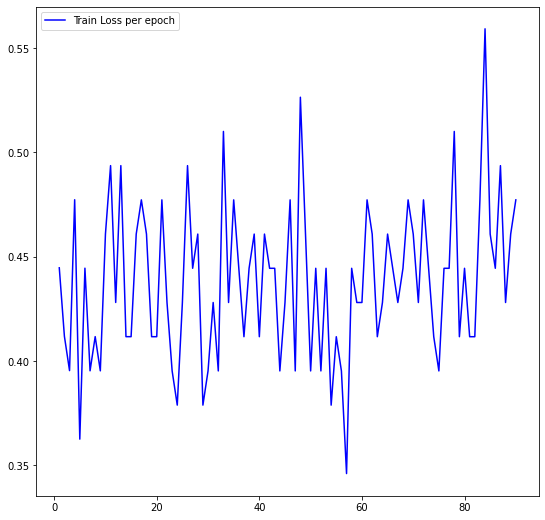

In [ ]:
x = GRU_STATS["epochs"]
y = _bring_to_cpu(GRU_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

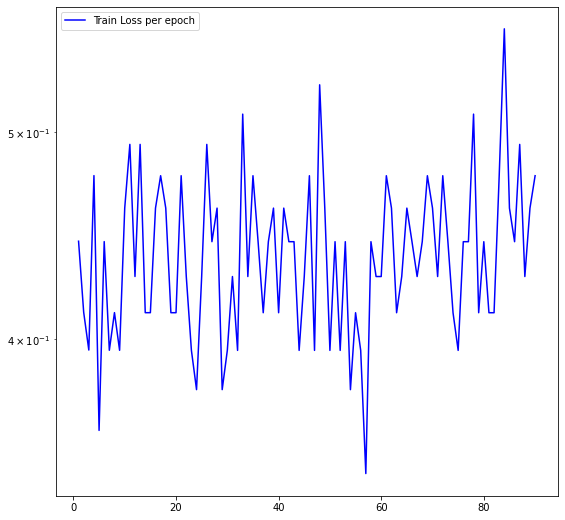

In [ ]:
x = GRU_STATS["epochs"]
y = _bring_to_cpu(GRU_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


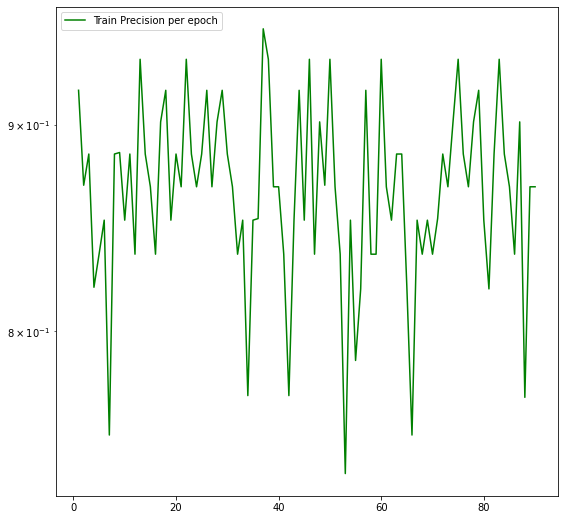

In [ ]:
x = GRU_STATS["epochs"]
y = GRU_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", log=True, color="green")

## Gráfico 4: Val Precision en función de épocas.



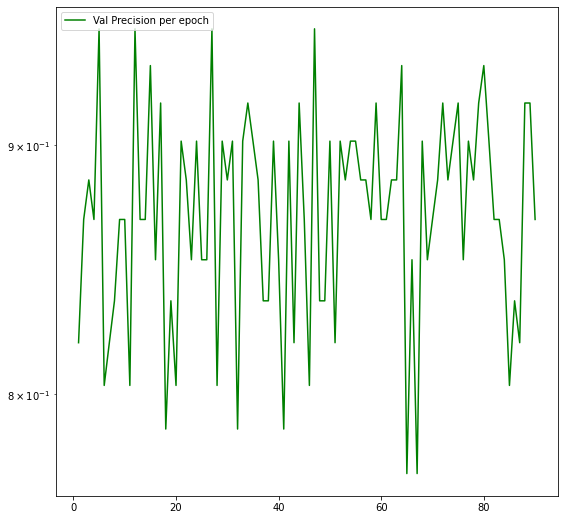

In [ ]:
x = GRU_STATS["epochs"]
y = GRU_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", log=True, color="green")

## Desempeño de red en el test set

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [ ]:
"""
Train

GRU_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

GRU_INSTANCE.eval()
output_val, _ = GRU_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


GRU_INSTANCE.eval()
output_test, _ = GRU_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


Vemos comportamientos similares en cada set. Como sabemos que todos los set tienen la misma distribución de Spam / No Spam, podemos afirmar que no hay overfitting.

## Test mensajes fijos

In [ ]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [ ]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

GRU_INSTANCE.eval()
output_val, _ = GRU_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

GRU_INSTANCE.eval()
output_val, _ = GRU_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento LSTM

In [53]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [55]:
# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance
LSTM_INSTANCE = CUSTOM_LSTM(input_size=300, 
                            output_size=2, 
                            hidden_dim=80, 
                            n_layers=1, 
                            device = device)

LSTM_INSTANCE = LSTM_INSTANCE.to(device)
n_epochs = 150
lr = 0.0015
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(LSTM_INSTANCE.parameters(), lr=lr)

# Training Loop Helper Function call
LSTM_STATS = training_loop(train_loader, val_loader, LSTM_INSTANCE, n_epochs)

100%|██████████| 61/61 [00:03<00:00, 17.31it/s]


Epoch: 1/150............. Loss Train Epoch: 0.4282............. 

100%|██████████| 61/61 [00:03<00:00, 17.87it/s]


Epoch: 2/150............. Loss Train Epoch: 0.4281............. 

100%|██████████| 61/61 [00:03<00:00, 18.29it/s]


Epoch: 3/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.49it/s]


Epoch: 4/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.30it/s]


Epoch: 5/150............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:03<00:00, 18.11it/s]


Epoch: 6/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.75it/s]


Epoch: 7/150............. Loss Train Epoch: 0.3625............. 

100%|██████████| 61/61 [00:03<00:00, 18.05it/s]


Epoch: 8/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.80it/s]


Epoch: 9/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.38it/s]


Epoch: 10/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.51it/s]


Epoch: 11/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 12/150............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:03<00:00, 18.39it/s]


Epoch: 13/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.15it/s]


Epoch: 14/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.10it/s]


Epoch: 15/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.35it/s]


Epoch: 16/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.27it/s]


Epoch: 17/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.65it/s]


Epoch: 18/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.48it/s]


Epoch: 19/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 15.90it/s]


Epoch: 20/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.95it/s]


Epoch: 21/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.01it/s]


Epoch: 22/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.22it/s]


Epoch: 23/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.21it/s]


Epoch: 24/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.25it/s]


Epoch: 25/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 17.91it/s]


Epoch: 26/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 27/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 28/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 29/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 30/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 31/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 32/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 33/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 34/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.84it/s]


Epoch: 35/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 36/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 37/150............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 38/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 17.85it/s]


Epoch: 39/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 40/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 41/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 42/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 43/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 44/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.66it/s]


Epoch: 45/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 46/150............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:03<00:00, 18.86it/s]


Epoch: 47/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 48/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 49/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 50/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 51/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 52/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 53/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 17.94it/s]


Epoch: 54/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 55/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 56/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 57/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 58/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.85it/s]


Epoch: 59/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 60/150............. Loss Train Epoch: 0.5592............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 61/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 62/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 63/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 64/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.84it/s]


Epoch: 65/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 66/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 67/150............. Loss Train Epoch: 0.3460............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 68/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 69/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 70/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 71/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 17.70it/s]


Epoch: 72/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 73/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 74/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 75/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 76/150............. Loss Train Epoch: 0.3297............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 77/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 78/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 79/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 80/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 81/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 82/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 83/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.85it/s]


Epoch: 84/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 85/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.89it/s]


Epoch: 86/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 87/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 88/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 89/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.85it/s]


Epoch: 90/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 91/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 92/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 93/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 94/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 95/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 96/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.61it/s]


Epoch: 97/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.86it/s]


Epoch: 98/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 99/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 100/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 101/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.84it/s]


Epoch: 102/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.69it/s]


Epoch: 103/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.77it/s]


Epoch: 104/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 105/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 106/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 107/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 108/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 109/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 110/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 111/150............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 112/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 113/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 114/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 115/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 116/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 117/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 118/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.71it/s]


Epoch: 119/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 120/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 121/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 122/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.67it/s]


Epoch: 123/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 124/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.69it/s]


Epoch: 125/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.82it/s]


Epoch: 126/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 127/150............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 128/150............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 129/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 130/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.69it/s]


Epoch: 131/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 132/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 133/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 134/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 135/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 136/150............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 137/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 138/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 139/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 140/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 141/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 142/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 143/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 144/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 145/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 146/150............. Loss Train Epoch: 0.3460............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 147/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 148/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 149/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]

Epoch: 150/150............. Loss Train Epoch: 0.5100............. 

## Gráfico 1: Train Loss en función de épocas


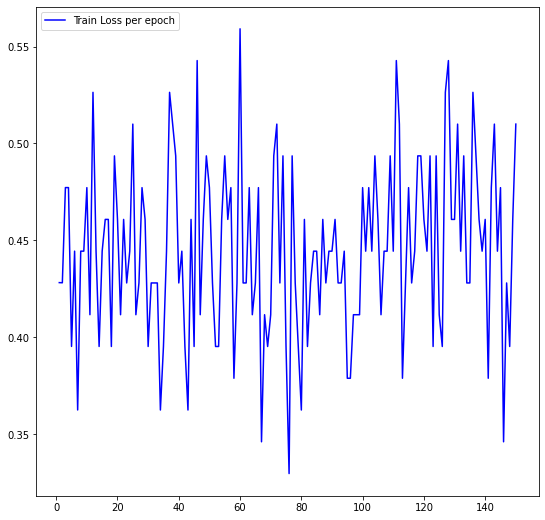

In [56]:
x = LSTM_STATS["epochs"]
y = _bring_to_cpu(LSTM_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

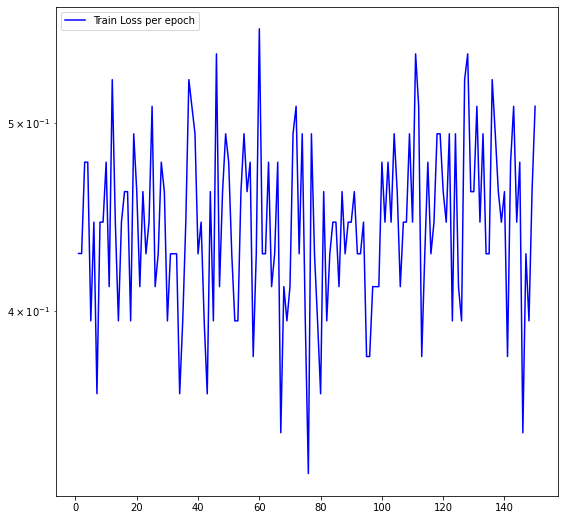

In [57]:
x = LSTM_STATS["epochs"]
y = _bring_to_cpu(LSTM_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


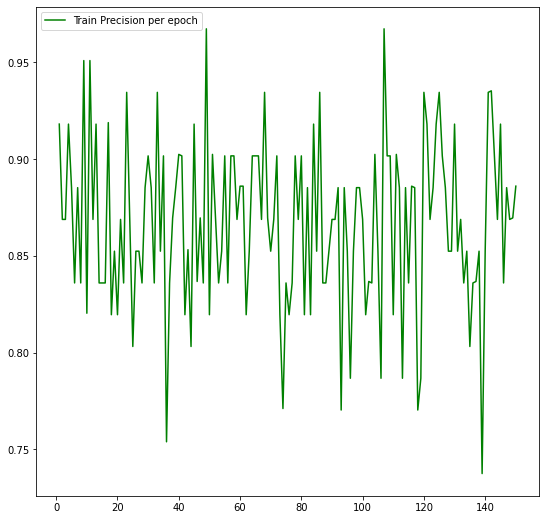

In [58]:
x = LSTM_STATS["epochs"]
y = LSTM_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", color="green")

## Gráfico 4: Val Precision en función de épocas.



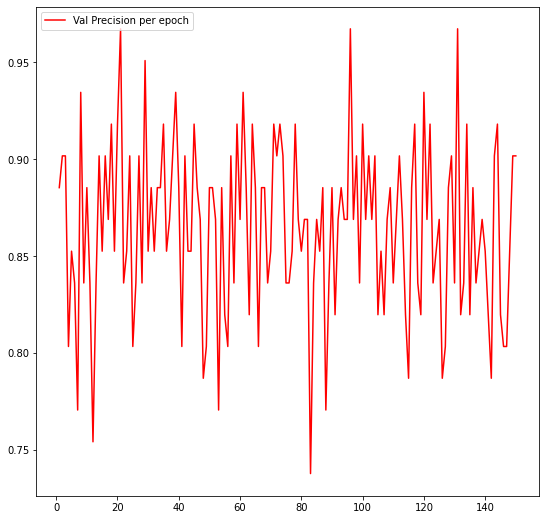

In [59]:
x = LSTM_STATS["epochs"]
y = LSTM_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", color="red")

## Desempeño de red en el test set

In [60]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [64]:
LSTM_INSTANCE

CUSTOM_LSTM(
  (embedding): Embedding(300000, 300)
  (lstm): LSTM(300, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

In [67]:
"""
Train

LSTM_INSTANCE.eval()
output_train, _ = LSTM_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

LSTM_INSTANCE.eval()
lstm_output, _ = LSTM_INSTANCE(_X_val)
y_predicted = _predict(lstm_output)
prec_val = _accuracy(y_predicted, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


LSTM_INSTANCE.eval()
output_test, _ = LSTM_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


Vemos comportamientos similares en cada set. Como sabemos que todos los set tienen la misma distribución de Spam / No Spam, podemos afirmar que no hay overfitting.

## Test mensajes fijos

In [ ]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [ ]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

LSTM_INSTANCE.eval()
output_val, _ = LSTM_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

LSTM_INSTANCE.eval()
output_val, _ = LSTM_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento LSTM Bidirectional

In [564]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance
BI_LSTM_INSTANCE = CUSTOM_BI_LSTM(input_size=300, 
                            output_size=2, 
                            hidden_dim=80, 
                            n_layers=1, 
                            device = device)

BI_LSTM_INSTANCE = BI_LSTM_INSTANCE.to(device)
n_epochs = 150
lr = 0.0015
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(BI_LSTM_INSTANCE.parameters(), lr=lr)

# Training Loop Helper Function call
BI_LSTM_STATS = training_loop(train_loader, val_loader, BI_LSTM_INSTANCE, n_epochs)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

100%|██████████| 61/61 [00:03<00:00, 18.61it/s]


Epoch: 1/150............. Loss Train Epoch: 0.4448............. 

100%|██████████| 61/61 [00:03<00:00, 18.37it/s]


Epoch: 2/150............. Loss Train Epoch: 0.4773............. 

100%|██████████| 61/61 [00:03<00:00, 18.05it/s]


Epoch: 3/150............. Loss Train Epoch: 0.4773............. 

100%|██████████| 61/61 [00:03<00:00, 18.30it/s]


Epoch: 4/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.33it/s]


Epoch: 5/150............. Loss Train Epoch: 0.4117............. 

100%|██████████| 61/61 [00:03<00:00, 18.35it/s]


Epoch: 6/150............. Loss Train Epoch: 0.4117............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 7/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 8/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.21it/s]


Epoch: 9/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 10/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 11/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.46it/s]


Epoch: 12/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 17.05it/s]


Epoch: 13/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.08it/s]


Epoch: 14/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.13it/s]


Epoch: 15/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.12it/s]


Epoch: 16/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.39it/s]


Epoch: 17/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.66it/s]


Epoch: 18/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 19/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 20/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 21/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 22/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 23/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.65it/s]


Epoch: 24/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 25/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.83it/s]


Epoch: 26/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 27/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 28/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 29/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.30it/s]


Epoch: 30/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.23it/s]


Epoch: 31/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.70it/s]


Epoch: 32/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 17.94it/s]


Epoch: 33/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 17.52it/s]


Epoch: 34/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 35/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.71it/s]


Epoch: 36/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 37/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.63it/s]


Epoch: 38/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.65it/s]


Epoch: 39/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 17.84it/s]


Epoch: 40/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.23it/s]


Epoch: 41/150............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:03<00:00, 18.41it/s]


Epoch: 42/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 43/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 44/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 45/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 46/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 47/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.47it/s]


Epoch: 48/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.34it/s]


Epoch: 49/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.79it/s]


Epoch: 50/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 51/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.71it/s]


Epoch: 52/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.85it/s]


Epoch: 53/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 54/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 55/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 56/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 57/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 58/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 59/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 60/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 61/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.81it/s]


Epoch: 62/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 63/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 64/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 65/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.76it/s]


Epoch: 66/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 67/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.69it/s]


Epoch: 68/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.80it/s]


Epoch: 69/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.48it/s]


Epoch: 70/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.43it/s]


Epoch: 71/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.89it/s]


Epoch: 72/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.11it/s]


Epoch: 73/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 17.74it/s]


Epoch: 74/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 17.93it/s]


Epoch: 75/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 16.71it/s]


Epoch: 76/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 16.22it/s]


Epoch: 77/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 17.26it/s]


Epoch: 78/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.39it/s]


Epoch: 79/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.21it/s]


Epoch: 80/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.54it/s]


Epoch: 81/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 82/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 83/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.75it/s]


Epoch: 84/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.69it/s]


Epoch: 85/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 86/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 17.52it/s]


Epoch: 87/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.35it/s]


Epoch: 88/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.08it/s]


Epoch: 89/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 17.71it/s]


Epoch: 90/150............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:03<00:00, 17.97it/s]


Epoch: 91/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.84it/s]


Epoch: 92/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 18.15it/s]


Epoch: 93/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.07it/s]


Epoch: 94/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.18it/s]


Epoch: 95/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.50it/s]


Epoch: 96/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.23it/s]


Epoch: 97/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.35it/s]


Epoch: 98/150............. Loss Train Epoch: 0.3297............. 

100%|██████████| 61/61 [00:03<00:00, 18.35it/s]


Epoch: 99/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 100/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.71it/s]


Epoch: 101/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 102/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 17.56it/s]


Epoch: 103/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.37it/s]


Epoch: 104/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 105/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.33it/s]


Epoch: 106/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 15.23it/s]


Epoch: 107/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 17.12it/s]


Epoch: 108/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.19it/s]


Epoch: 109/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.35it/s]


Epoch: 110/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.33it/s]


Epoch: 111/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 112/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.34it/s]


Epoch: 113/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.25it/s]


Epoch: 114/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.28it/s]


Epoch: 115/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.10it/s]


Epoch: 116/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.12it/s]


Epoch: 117/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.40it/s]


Epoch: 118/150............. Loss Train Epoch: 0.5756............. 

100%|██████████| 61/61 [00:03<00:00, 17.65it/s]


Epoch: 119/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.86it/s]


Epoch: 120/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.67it/s]


Epoch: 121/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.64it/s]


Epoch: 122/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.25it/s]


Epoch: 123/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.39it/s]


Epoch: 124/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.59it/s]


Epoch: 125/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.21it/s]


Epoch: 126/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.08it/s]


Epoch: 127/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.91it/s]


Epoch: 128/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 14.23it/s]


Epoch: 129/150............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.47it/s]


Epoch: 130/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.06it/s]


Epoch: 131/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.88it/s]


Epoch: 132/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.15it/s]


Epoch: 133/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.24it/s]


Epoch: 134/150............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 18.68it/s]


Epoch: 135/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.54it/s]


Epoch: 136/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.68it/s]


Epoch: 137/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.67it/s]


Epoch: 138/150............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 18.74it/s]


Epoch: 139/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.77it/s]


Epoch: 140/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.68it/s]


Epoch: 141/150............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 142/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 143/150............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 18.71it/s]


Epoch: 144/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.78it/s]


Epoch: 145/150............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 18.73it/s]


Epoch: 146/150............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 18.67it/s]


Epoch: 147/150............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 18.70it/s]


Epoch: 148/150............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 18.72it/s]


Epoch: 149/150............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 18.69it/s]

Epoch: 150/150............. Loss Train Epoch: 0.3952............. 

## Gráfico 1: Train Loss en función de épocas

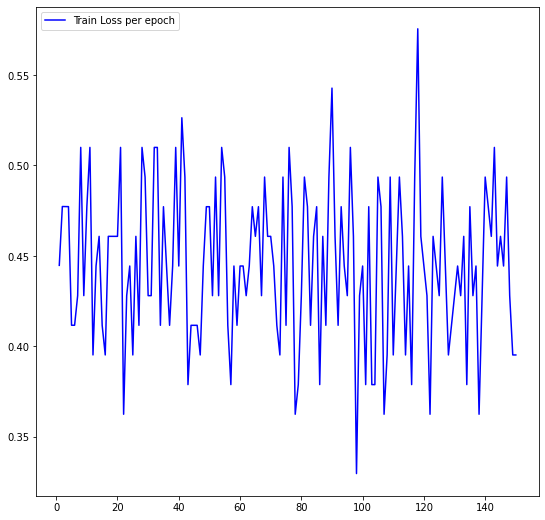

In [565]:
x = BI_LSTM_STATS["epochs"]
y = _bring_to_cpu(BI_LSTM_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

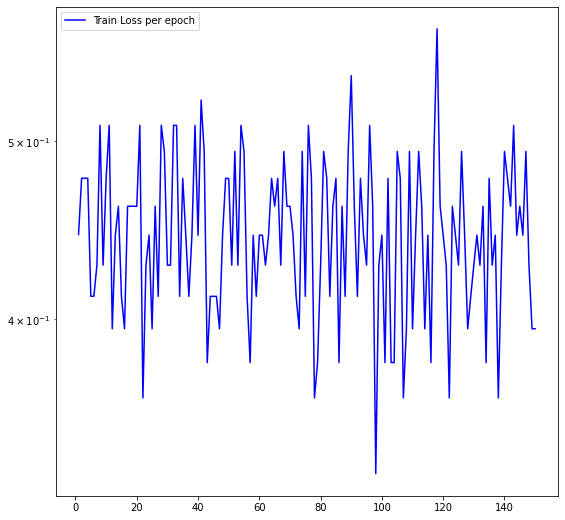

In [566]:
x = BI_LSTM_STATS["epochs"]
y = _bring_to_cpu(BI_LSTM_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


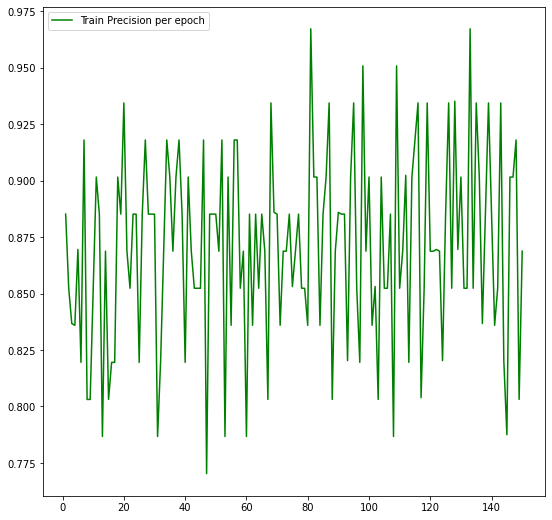

In [567]:
x = BI_LSTM_STATS["epochs"]
y = BI_LSTM_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", color="green")

## Gráfico 4: Val Precision en función de épocas.



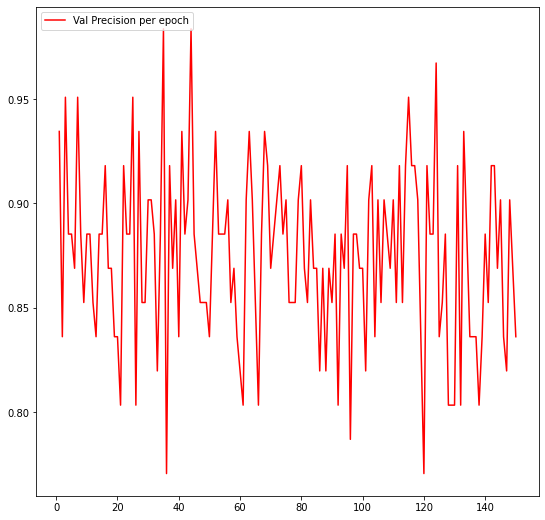

In [568]:
x = BI_LSTM_STATS["epochs"]
y = BI_LSTM_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", color="red")

## Desempeño de red en el test set

In [569]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [570]:
"""
Train

GRU_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

BI_LSTM_INSTANCE.eval()
output_val, _ = BI_LSTM_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


BI_LSTM_INSTANCE.eval()
output_test, _ = BI_LSTM_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


## Test mensajes fijos

In [571]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [572]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

BI_LSTM_INSTANCE.eval()
output_val, _ = BI_LSTM_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

BI_LSTM_INSTANCE.eval()
output_val, _ = BI_LSTM_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# **Actividad 5** Doble capa oculta
AC04 pero con dos capas ocultas

# Entrenamiento RNN - doble capa oculta

In [17]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance

RNN_2H_INSTANCE = RNN_CUSTOM(input_size=300, 
                          output_size=2, 
                          hidden_dim=80, 
                          n_layers=2, 
                          device = device)

RNN_2H_INSTANCE = RNN_2H_INSTANCE.to(device)
n_epochs = 50

# Training Loop Helper Function call
RNN_2H_STATS = training_loop(train_loader, val_loader, RNN_2H_INSTANCE, n_epochs)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

100%|██████████| 61/61 [00:03<00:00, 16.87it/s]


Epoch: 1/50............. Loss Train Epoch: 0.4610............. 

100%|██████████| 61/61 [00:03<00:00, 17.03it/s]


Epoch: 2/50............. Loss Train Epoch: 0.5756............. 

100%|██████████| 61/61 [00:03<00:00, 17.01it/s]


Epoch: 3/50............. Loss Train Epoch: 0.4445............. 

100%|██████████| 61/61 [00:03<00:00, 17.08it/s]


Epoch: 4/50............. Loss Train Epoch: 0.4609............. 

100%|██████████| 61/61 [00:03<00:00, 16.73it/s]


Epoch: 5/50............. Loss Train Epoch: 0.4281............. 

100%|██████████| 61/61 [00:03<00:00, 16.66it/s]


Epoch: 6/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 16.82it/s]


Epoch: 7/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 8/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.20it/s]


Epoch: 9/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.01it/s]


Epoch: 10/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.06it/s]


Epoch: 11/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.03it/s]


Epoch: 12/50............. Loss Train Epoch: 0.3461............. 

100%|██████████| 61/61 [00:03<00:00, 17.04it/s]


Epoch: 13/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.99it/s]


Epoch: 14/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.10it/s]


Epoch: 15/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.04it/s]


Epoch: 16/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.06it/s]


Epoch: 17/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.14it/s]


Epoch: 18/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 19/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 17.02it/s]


Epoch: 20/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.08it/s]


Epoch: 21/50............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 17.02it/s]


Epoch: 22/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 17.00it/s]


Epoch: 23/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.02it/s]


Epoch: 24/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 25/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 17.16it/s]


Epoch: 26/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 17.10it/s]


Epoch: 27/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.01it/s]


Epoch: 28/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 17.03it/s]


Epoch: 29/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 17.05it/s]


Epoch: 30/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 17.05it/s]


Epoch: 31/50............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 32/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.03it/s]


Epoch: 33/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 17.09it/s]


Epoch: 34/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.99it/s]


Epoch: 35/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 36/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 17.03it/s]


Epoch: 37/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.97it/s]


Epoch: 38/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 17.11it/s]


Epoch: 39/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 17.00it/s]


Epoch: 40/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 41/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.98it/s]


Epoch: 42/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 17.15it/s]


Epoch: 43/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.98it/s]


Epoch: 44/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 17.08it/s]


Epoch: 45/50............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:03<00:00, 17.08it/s]


Epoch: 46/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 47/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.86it/s]


Epoch: 48/50............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 16.84it/s]


Epoch: 49/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.92it/s]

Epoch: 50/50............. Loss Train Epoch: 0.3952............. 

## Gráfico 1: Train Loss en función de épocas

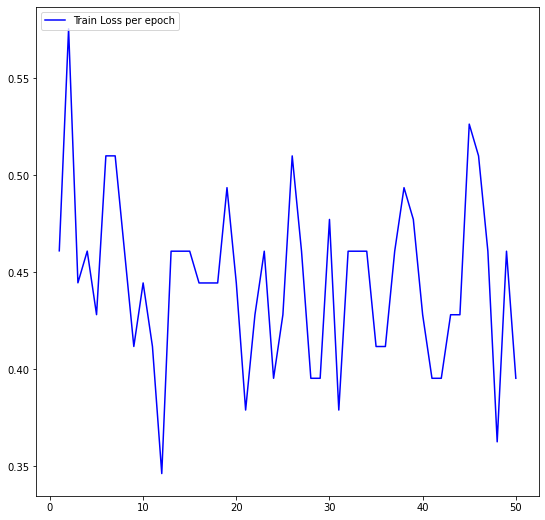

In [18]:
x = RNN_2H_STATS["epochs"]
y = _bring_to_cpu(RNN_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

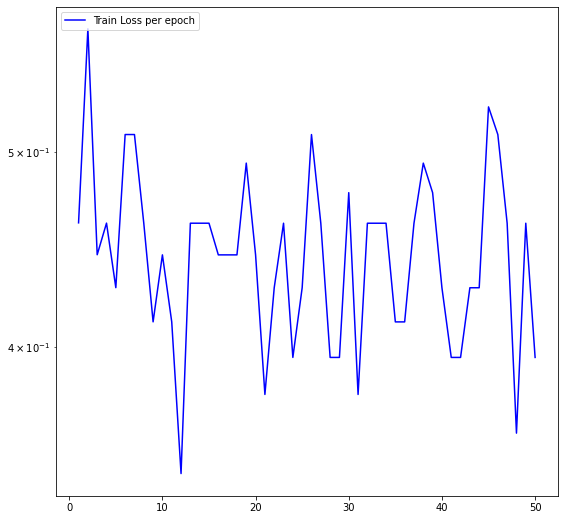

In [19]:
x = RNN_2H_STATS["epochs"]
y = _bring_to_cpu(RNN_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


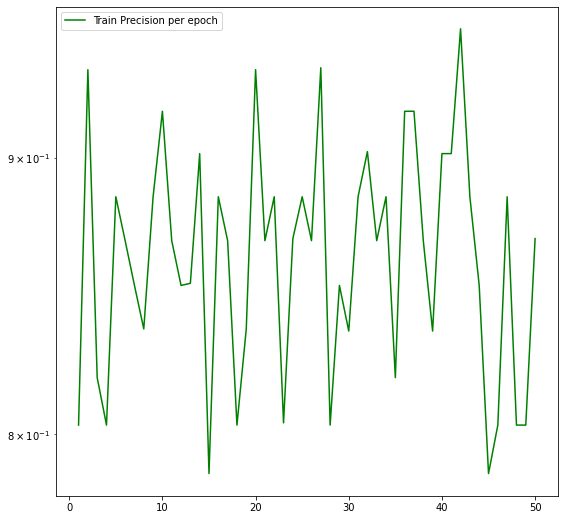

In [20]:
x = RNN_2H_STATS["epochs"]
y = RNN_2H_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", log=True, color="green")

## Gráfico 4: Val Precision en función de épocas.



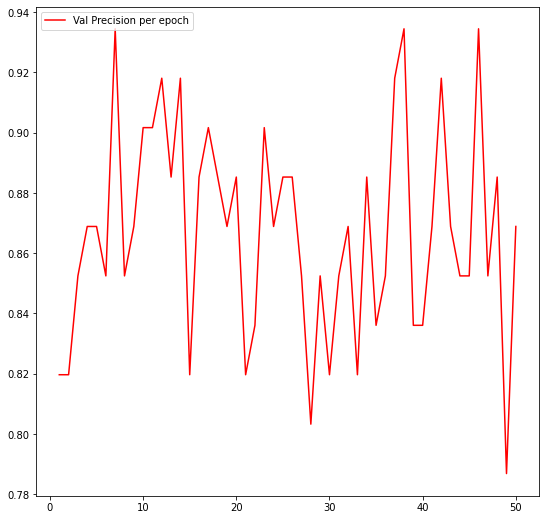

In [21]:
x = RNN_2H_STATS["epochs"]
y = RNN_2H_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", color="red")

## Desempeño de red en el test set

In [22]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [23]:
"""
Train

GRU_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

RNN_2H_INSTANCE.eval()
output_val, _ = RNN_2H_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


RNN_2H_INSTANCE.eval()
output_test, _ = RNN_2H_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


## Test mensajes fijos

In [24]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [25]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

RNN_2H_INSTANCE.eval()
output_val, _ = RNN_2H_INSTANCE(custom_msg_x_train)
print(output_val.shape)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

RNN_2H_INSTANCE.eval()
output_val, _ = RNN_2H_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

torch.Size([600, 2])
message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento GRU - doble capa oculta

In [26]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance
GRU_2H_INSTANCE = GRU_CUSTOM(input_size=300, 
                          output_size=2, 
                          hidden_dim=80, 
                          n_layers=2, 
                          device = device)

GRU_2H_INSTANCE = GRU_2H_INSTANCE.to(device)
n_epochs = 50

# Training Loop Helper Function call
GRU_2H_STATS = training_loop(train_loader, val_loader, GRU_2H_INSTANCE, n_epochs)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 1/50............. Loss Train Epoch: 0.4775............. 

100%|██████████| 61/61 [00:03<00:00, 16.93it/s]


Epoch: 2/50............. Loss Train Epoch: 0.3628............. 

100%|██████████| 61/61 [00:03<00:00, 16.89it/s]


Epoch: 3/50............. Loss Train Epoch: 0.4282............. 

100%|██████████| 61/61 [00:03<00:00, 16.85it/s]


Epoch: 4/50............. Loss Train Epoch: 0.3790............. 

100%|██████████| 61/61 [00:03<00:00, 16.94it/s]


Epoch: 5/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 6/50............. Loss Train Epoch: 0.4445............. 

100%|██████████| 61/61 [00:03<00:00, 16.85it/s]


Epoch: 7/50............. Loss Train Epoch: 0.4445............. 

100%|██████████| 61/61 [00:03<00:00, 16.98it/s]


Epoch: 8/50............. Loss Train Epoch: 0.4281............. 

100%|██████████| 61/61 [00:03<00:00, 16.95it/s]


Epoch: 9/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 16.88it/s]


Epoch: 10/50............. Loss Train Epoch: 0.4117............. 

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 11/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 16.99it/s]


Epoch: 12/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 16.94it/s]


Epoch: 13/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.94it/s]


Epoch: 14/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 16.92it/s]


Epoch: 15/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.92it/s]


Epoch: 16/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.80it/s]


Epoch: 17/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 16.92it/s]


Epoch: 18/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.66it/s]


Epoch: 19/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 20/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 21/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.85it/s]


Epoch: 22/50............. Loss Train Epoch: 0.3625............. 

100%|██████████| 61/61 [00:03<00:00, 16.90it/s]


Epoch: 23/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 24/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 16.92it/s]


Epoch: 25/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.98it/s]


Epoch: 26/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 16.94it/s]


Epoch: 27/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.81it/s]


Epoch: 28/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.84it/s]


Epoch: 29/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 16.91it/s]


Epoch: 30/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.92it/s]


Epoch: 31/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.97it/s]


Epoch: 32/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 16.79it/s]


Epoch: 33/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 16.94it/s]


Epoch: 34/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 17.01it/s]


Epoch: 35/50............. Loss Train Epoch: 0.5592............. 

100%|██████████| 61/61 [00:03<00:00, 17.00it/s]


Epoch: 36/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 16.99it/s]


Epoch: 37/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 16.97it/s]


Epoch: 38/50............. Loss Train Epoch: 0.5592............. 

100%|██████████| 61/61 [00:03<00:00, 16.96it/s]


Epoch: 39/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 16.59it/s]


Epoch: 40/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 17.00it/s]


Epoch: 41/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.87it/s]


Epoch: 42/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 16.97it/s]


Epoch: 43/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 16.95it/s]


Epoch: 44/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:04<00:00, 14.34it/s]


Epoch: 45/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 13.40it/s]


Epoch: 46/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.29it/s]


Epoch: 47/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:05<00:00, 10.81it/s]


Epoch: 48/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.06it/s]


Epoch: 49/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:04<00:00, 13.77it/s]

Epoch: 50/50............. Loss Train Epoch: 0.4608............. 

## Gráfico 1: Train Loss en función de épocas

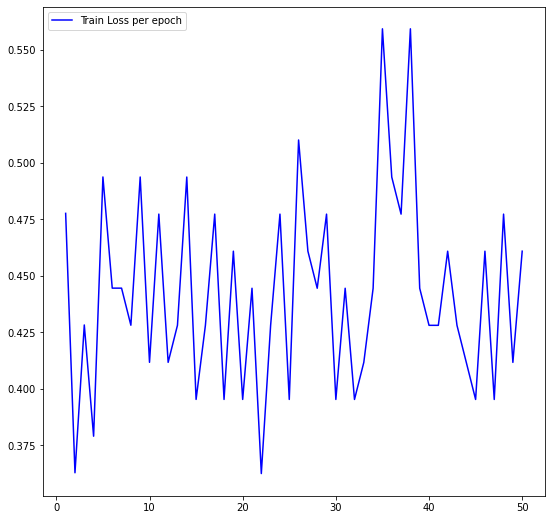

In [27]:
x = GRU_2H_STATS["epochs"]
y = _bring_to_cpu(GRU_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

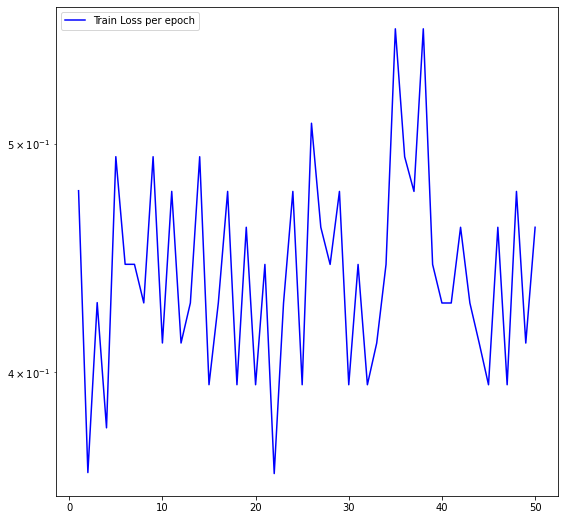

In [28]:
x = GRU_2H_STATS["epochs"]
y = _bring_to_cpu(GRU_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


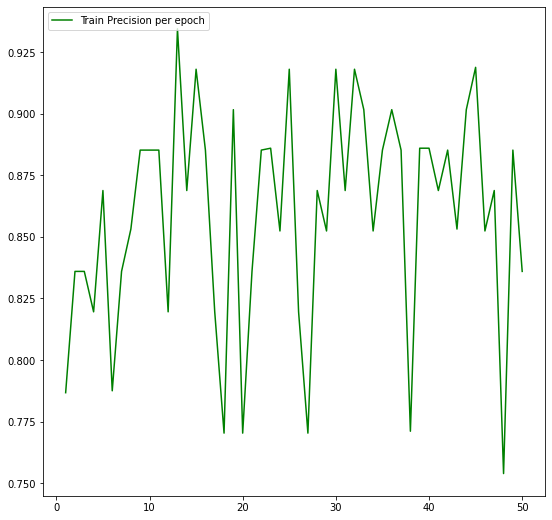

In [47]:
x = GRU_2H_STATS["epochs"]
y = GRU_2H_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", color="green")

## Gráfico 4: Val Precision en función de épocas.



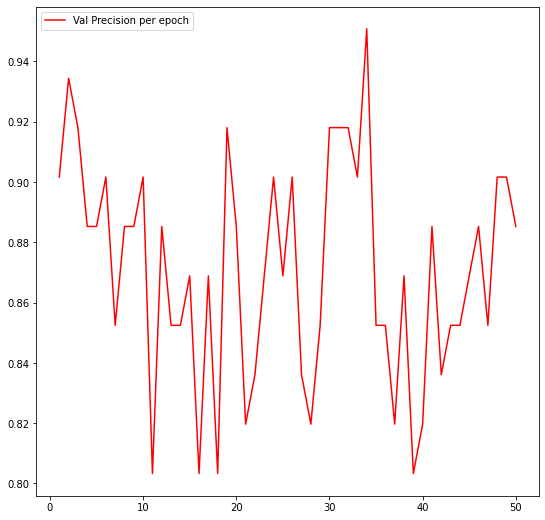

In [48]:
x = GRU_2H_STATS["epochs"]
y = GRU_2H_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", color="red")

## Desempeño de red en el test set

In [31]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [35]:
"""
Train

GRU_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

GRU_2H_INSTANCE.eval()
output_val, _ = GRU_2H_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


GRU_2H_INSTANCE.eval()
output_test, _ = GRU_2H_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


## Test mensajes fijos

In [36]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [37]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

GRU_2H_INSTANCE.eval()
output_val, _ = GRU_2H_INSTANCE(custom_msg_x_train)
print(output_val.shape)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

GRU_2H_INSTANCE.eval()
output_val, _ = GRU_2H_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

torch.Size([600, 2])
message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento LSTM - doble capa oculta

In [38]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance
LSTM_2H_INSTANCE = CUSTOM_LSTM(input_size=300, 
                          output_size=2, 
                          hidden_dim=80, 
                          n_layers=2, 
                          device = device)

LSTM_2H_INSTANCE = LSTM_2H_INSTANCE.to(device)
n_epochs = 50

# Training Loop Helper Function call
LSTM_2H_STATS = training_loop(train_loader, val_loader, LSTM_2H_INSTANCE, n_epochs)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

100%|██████████| 61/61 [00:03<00:00, 15.42it/s]


Epoch: 1/50............. Loss Train Epoch: 0.4609............. 

100%|██████████| 61/61 [00:04<00:00, 15.12it/s]


Epoch: 2/50............. Loss Train Epoch: 0.4281............. 

100%|██████████| 61/61 [00:05<00:00, 11.81it/s]


Epoch: 3/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.71it/s]


Epoch: 4/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:04<00:00, 14.99it/s]


Epoch: 5/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.75it/s]


Epoch: 6/50............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:04<00:00, 15.23it/s]


Epoch: 7/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.52it/s]


Epoch: 8/50............. Loss Train Epoch: 0.3789............. 

100%|██████████| 61/61 [00:03<00:00, 15.54it/s]


Epoch: 9/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 15.43it/s]


Epoch: 10/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.49it/s]


Epoch: 11/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.43it/s]


Epoch: 12/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.49it/s]


Epoch: 13/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.64it/s]


Epoch: 14/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.54it/s]


Epoch: 15/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 15.46it/s]


Epoch: 16/50............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 15.44it/s]


Epoch: 17/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.48it/s]


Epoch: 18/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.41it/s]


Epoch: 19/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.46it/s]


Epoch: 20/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.50it/s]


Epoch: 21/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 15.60it/s]


Epoch: 22/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.66it/s]


Epoch: 23/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 15.44it/s]


Epoch: 24/50............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:03<00:00, 15.42it/s]


Epoch: 25/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 15.48it/s]


Epoch: 26/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.51it/s]


Epoch: 27/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.66it/s]


Epoch: 28/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 15.43it/s]


Epoch: 29/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 14.07it/s]


Epoch: 30/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.46it/s]


Epoch: 31/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.34it/s]


Epoch: 32/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.53it/s]


Epoch: 33/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.52it/s]


Epoch: 34/50............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 15.22it/s]


Epoch: 35/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.45it/s]


Epoch: 36/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.61it/s]


Epoch: 37/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.45it/s]


Epoch: 38/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.45it/s]


Epoch: 39/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 15.48it/s]


Epoch: 40/50............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 15.55it/s]


Epoch: 41/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.53it/s]


Epoch: 42/50............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:03<00:00, 15.34it/s]


Epoch: 43/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.51it/s]


Epoch: 44/50............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.58it/s]


Epoch: 45/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.46it/s]


Epoch: 46/50............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 15.49it/s]


Epoch: 47/50............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.53it/s]


Epoch: 48/50............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:03<00:00, 15.44it/s]


Epoch: 49/50............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 14.56it/s]

Epoch: 50/50............. Loss Train Epoch: 0.4116............. 

## Gráfico 1: Train Loss en función de épocas

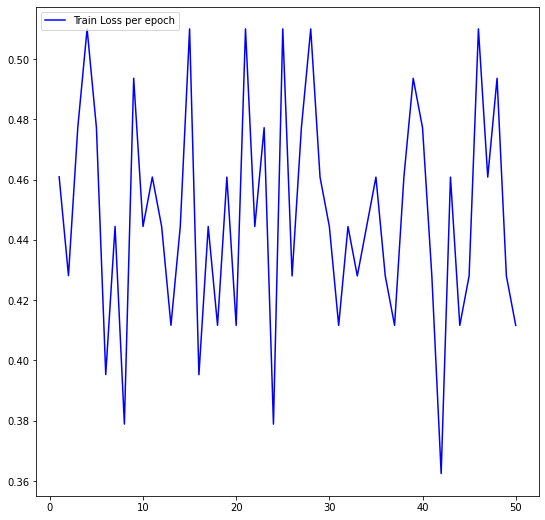

In [39]:
x = LSTM_2H_STATS["epochs"]
y = _bring_to_cpu(LSTM_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

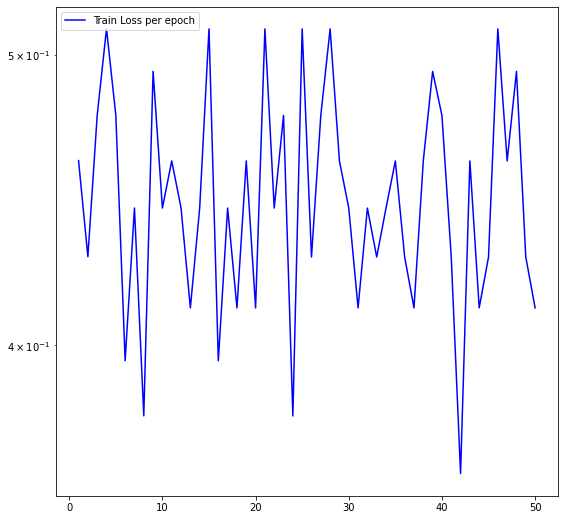

In [40]:
x = LSTM_2H_STATS["epochs"]
y = _bring_to_cpu(LSTM_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


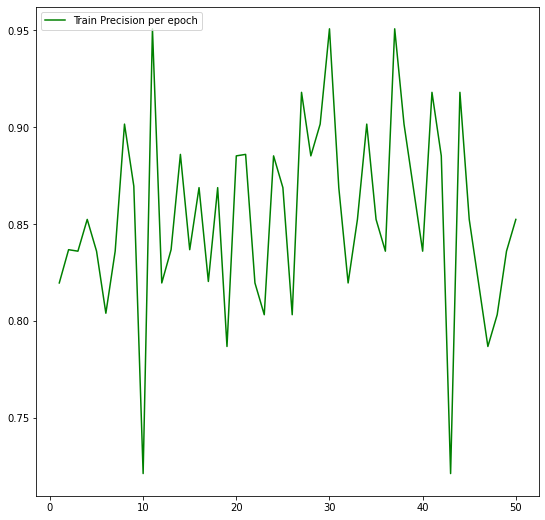

In [49]:
x = LSTM_2H_STATS["epochs"]
y = LSTM_2H_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", color="green")

## Gráfico 4: Val Precision en función de épocas.



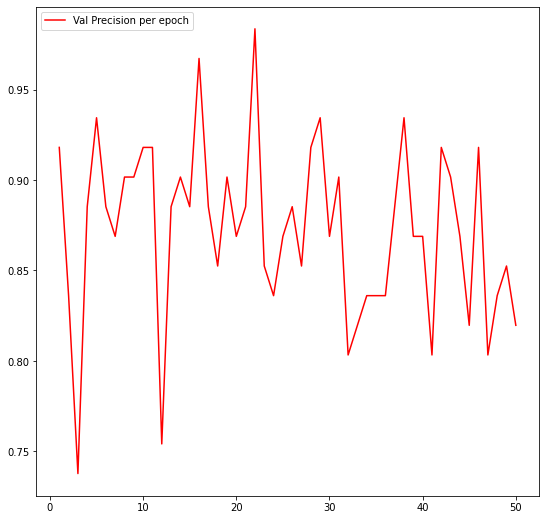

In [42]:
x = LSTM_2H_STATS["epochs"]
y = LSTM_2H_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", color="red")

## Desempeño de red en el test set

In [43]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [46]:
"""
Train

GRU_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

LSTM_2H_INSTANCE.eval()
output_val, _ = LSTM_2H_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


LSTM_2H_INSTANCE.eval()
output_test, _ = LSTM_2H_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


## Test mensajes fijos

In [68]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [69]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

LSTM_2H_INSTANCE.eval()
output_val, _ = LSTM_2H_INSTANCE(custom_msg_x_train)
print(output_val.shape)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

LSTM_2H_INSTANCE.eval()
output_val, _ = LSTM_2H_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

torch.Size([600, 2])
message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento LSTM-Bi - doble capa oculta

In [554]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()

# LOADERS
batch_size = 64
train_loader, val_loader = _get_data_loaders(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, device=device)

# Model Instance
BI_LSTM_2H_INSTANCE = CUSTOM_BI_LSTM(input_size=300, 
                          output_size=2, 
                          hidden_dim=80, 
                          n_layers=2, 
                          device = device)

BI_LSTM_2H_INSTANCE = BI_LSTM_2H_INSTANCE.to(device)
n_epochs = 70

# Training Loop Helper Function call
BI_LSTM_2H_STATS = training_loop(train_loader, val_loader, BI_LSTM_2H_INSTANCE, n_epochs)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

100%|██████████| 61/61 [00:03<00:00, 15.63it/s]


Epoch: 1/70............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:03<00:00, 15.56it/s]


Epoch: 2/70............. Loss Train Epoch: 0.4609............. 

100%|██████████| 61/61 [00:03<00:00, 15.56it/s]


Epoch: 3/70............. Loss Train Epoch: 0.3789............. 

100%|██████████| 61/61 [00:03<00:00, 15.55it/s]


Epoch: 4/70............. Loss Train Epoch: 0.3953............. 

100%|██████████| 61/61 [00:03<00:00, 15.48it/s]


Epoch: 5/70............. Loss Train Epoch: 0.4117............. 

100%|██████████| 61/61 [00:03<00:00, 15.62it/s]


Epoch: 6/70............. Loss Train Epoch: 0.4281............. 

100%|██████████| 61/61 [00:03<00:00, 15.63it/s]


Epoch: 7/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.60it/s]


Epoch: 8/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.64it/s]


Epoch: 9/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 15.58it/s]


Epoch: 10/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 15.61it/s]


Epoch: 11/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.62it/s]


Epoch: 12/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 15.63it/s]


Epoch: 13/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:03<00:00, 15.66it/s]


Epoch: 14/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:03<00:00, 15.58it/s]


Epoch: 15/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.59it/s]


Epoch: 16/70............. Loss Train Epoch: 0.5100............. 

100%|██████████| 61/61 [00:03<00:00, 15.68it/s]


Epoch: 17/70............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:03<00:00, 15.57it/s]


Epoch: 18/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.60it/s]


Epoch: 19/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 15.22it/s]


Epoch: 20/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 13.77it/s]


Epoch: 21/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 14.86it/s]


Epoch: 22/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 15.07it/s]


Epoch: 23/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.62it/s]


Epoch: 24/70............. Loss Train Epoch: 0.5264............. 

100%|██████████| 61/61 [00:04<00:00, 14.86it/s]


Epoch: 25/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.71it/s]


Epoch: 26/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 13.83it/s]


Epoch: 27/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:05<00:00, 11.96it/s]


Epoch: 28/70............. Loss Train Epoch: 0.3788............. 

100%|██████████| 61/61 [00:04<00:00, 14.51it/s]


Epoch: 29/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 14.68it/s]


Epoch: 30/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 13.50it/s]


Epoch: 31/70............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:04<00:00, 14.74it/s]


Epoch: 32/70............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:04<00:00, 15.02it/s]


Epoch: 33/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.61it/s]


Epoch: 34/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.36it/s]


Epoch: 35/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 13.87it/s]


Epoch: 36/70............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:04<00:00, 14.08it/s]


Epoch: 37/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.95it/s]


Epoch: 38/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 12.92it/s]


Epoch: 39/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 13.94it/s]


Epoch: 40/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 13.38it/s]


Epoch: 41/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 14.36it/s]


Epoch: 42/70............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:04<00:00, 13.27it/s]


Epoch: 43/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 14.81it/s]


Epoch: 44/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.31it/s]


Epoch: 45/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.90it/s]


Epoch: 46/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 12.45it/s]


Epoch: 47/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 14.07it/s]


Epoch: 48/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.59it/s]


Epoch: 49/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 14.62it/s]


Epoch: 50/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.70it/s]


Epoch: 51/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:03<00:00, 15.49it/s]


Epoch: 52/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:03<00:00, 15.65it/s]


Epoch: 53/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:03<00:00, 15.57it/s]


Epoch: 54/70............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:04<00:00, 14.91it/s]


Epoch: 55/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 14.67it/s]


Epoch: 56/70............. Loss Train Epoch: 0.5428............. 

100%|██████████| 61/61 [00:04<00:00, 14.74it/s]


Epoch: 57/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 14.35it/s]


Epoch: 58/70............. Loss Train Epoch: 0.3624............. 

100%|██████████| 61/61 [00:04<00:00, 13.55it/s]


Epoch: 59/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 13.53it/s]


Epoch: 60/70............. Loss Train Epoch: 0.4444............. 

100%|██████████| 61/61 [00:04<00:00, 14.66it/s]


Epoch: 61/70............. Loss Train Epoch: 0.4116............. 

100%|██████████| 61/61 [00:03<00:00, 15.33it/s]


Epoch: 62/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 14.96it/s]


Epoch: 63/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 13.34it/s]


Epoch: 64/70............. Loss Train Epoch: 0.4772............. 

100%|██████████| 61/61 [00:04<00:00, 13.16it/s]


Epoch: 65/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 14.89it/s]


Epoch: 66/70............. Loss Train Epoch: 0.3952............. 

100%|██████████| 61/61 [00:04<00:00, 13.43it/s]


Epoch: 67/70............. Loss Train Epoch: 0.4936............. 

100%|██████████| 61/61 [00:04<00:00, 12.41it/s]


Epoch: 68/70............. Loss Train Epoch: 0.4280............. 

100%|██████████| 61/61 [00:04<00:00, 13.65it/s]


Epoch: 69/70............. Loss Train Epoch: 0.4608............. 

100%|██████████| 61/61 [00:04<00:00, 14.59it/s]

Epoch: 70/70............. Loss Train Epoch: 0.4608............. 

## Gráfico 1: Train Loss en función de épocas

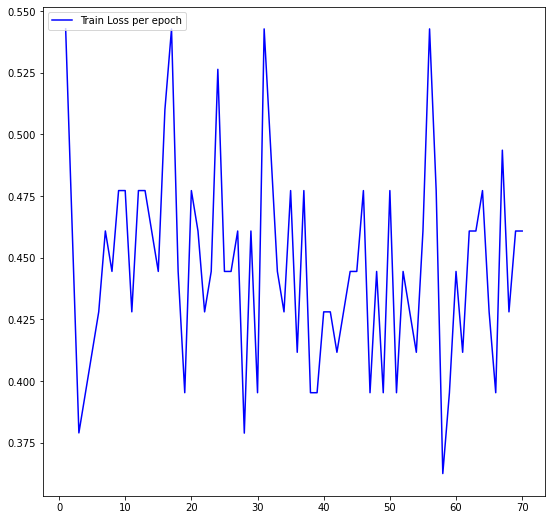

In [555]:
x = BI_LSTM_2H_STATS["epochs"]
y = _bring_to_cpu(BI_LSTM_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss")

## Gráfico 2: Train Loss en función de épocas (log)

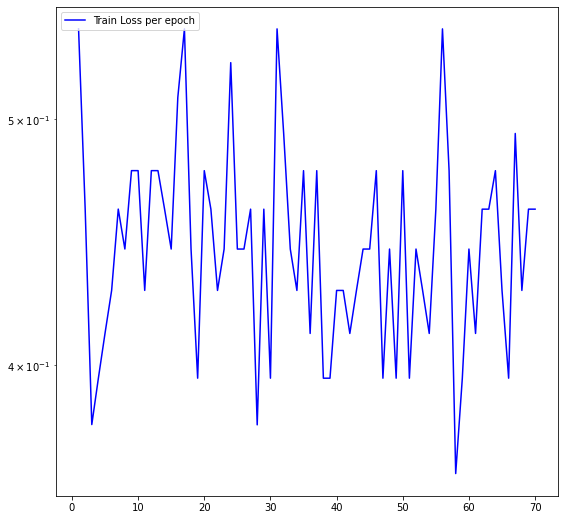

In [556]:
x = BI_LSTM_2H_STATS["epochs"]
y = _bring_to_cpu(BI_LSTM_2H_STATS["loss_by_epoch"])
_plot(x, y, _set_="Train", measure="Loss", log=True)

## Gráfico 3: Train Precision en función de las épocas.


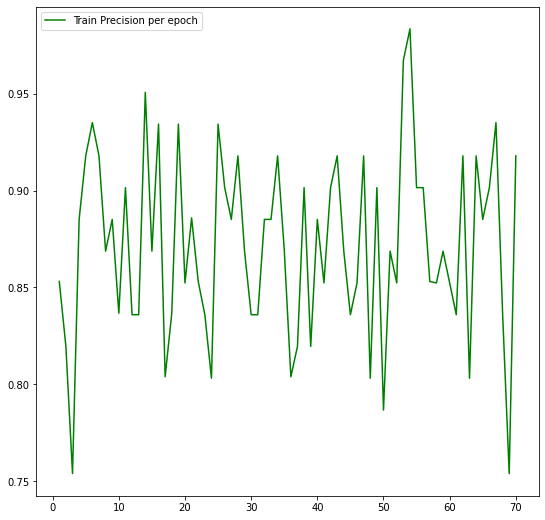

In [557]:
x = BI_LSTM_2H_STATS["epochs"]
y = BI_LSTM_2H_STATS["train_precision"]
_plot(x, y, _set_="Train", measure="Precision", color="green")

## Gráfico 4: Val Precision en función de épocas.



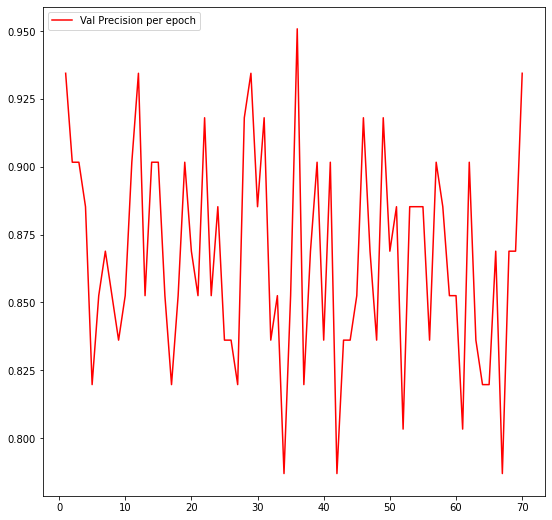

In [558]:
x = BI_LSTM_2H_STATS["epochs"]
y = BI_LSTM_2H_STATS["val_precision"]
_plot(x, y, _set_="Val", measure="Precision", color="red")

## Desempeño de red en el test set

In [559]:
X_train, y_train, X_test, y_test, X_val, y_val = _get_clean_data()
_X_train, _y_train, _X_test, _y_test, _X_val, _y_val = tensorize(X_train, y_train, X_test, y_test, X_val, y_val)

_X_train = _X_train.to(device)
_y_train = _y_train.to(device)
_X_val = _X_val.to(device)
_y_val = _y_val.to(device)
_X_test = _X_test.to(device)
_y_test = _y_test.to(device)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483
- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.068160

In [560]:
"""
Train

GRU_INSTANCE.eval()
output_train, _ = GRU_INSTANCE(_X_train)
pred_train = _predict(output_train)
prec_train = _accuracy(pred_train, _y_train) / len(_X_train)
print("Precisión en el train set: ", round(prec_train*100, 2))
"""

BI_LSTM_2H_INSTANCE.eval()
output_val, _ = BI_LSTM_2H_INSTANCE(_X_val)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(_X_val)
print("Precisión en el val set: ", round(prec_val*100, 2))


BI_LSTM_2H_INSTANCE.eval()
output_test, _ = BI_LSTM_2H_INSTANCE(_X_test)
pred_test = _predict(output_test)
prec_test = _accuracy(pred_test, y_test)/ len(_X_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el val set:  86.64
Precisión en el test set:  86.56


## Test mensajes fijos

In [561]:
msge_1 = 'ham\tHi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'spam\tSUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

data = [msge_1, msge_2]
_all_data = []
for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  _all_data.append([_msg, tag])

print(_all_data)

_messages = pd.DataFrame(data=_all_data, columns=["message", "label"])
#_messages.index = _messages.index + 1
print(_messages.head())


_messages['message'] = _messages['message'].apply(get_mean_vector)
_messages.loc[_messages['label'] == 'spam', 'label'] = 1
_messages.loc[_messages['label'] == 'ham', 'label'] = 0

print(_messages)


X_train = _messages["message"]
y_train = _messages["label"]

custom_msg_x_train, custom_msg_y_train = _tensorize_dataset(X_train, y_train)

[['Hi Rodrigo How are you I hope you very well Hey dude I invite you to my party ', 'ham'], ['SUPPORT CHILE Send a message to 3311 with the word Chile to show your support to your football selection', 'spam']]
                                             message label
0  Hi Rodrigo How are you I hope you very well He...   ham
1  SUPPORT CHILE Send a message to 3311 with the ...  spam
                                             message label
0  [-0.11383447891626602, 0.07423127003205128, 0....     0
1  [-0.13757793719951922, 0.09205774160531852, -0...     1


In [562]:
custom_msg_x_train = custom_msg_x_train.to(device)
custom_msg_x_train = custom_msg_x_train.to(device)

BI_LSTM_2H_INSTANCE.eval()
output_val, _ = BI_LSTM_2H_INSTANCE(custom_msg_x_train)
print(output_val.shape)
pred_val = _predict(output_val)[0]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"
print("message: ", msge_1)
print("Predicted as: ", pred_val, "\n")

BI_LSTM_2H_INSTANCE.eval()
output_val, _ = BI_LSTM_2H_INSTANCE(custom_msg_x_train)
pred_val = _predict(output_val)[1]

if pred_val == 1:
  pred_val = "SPAM"
elif pred_val == 0:
  pred_val = "NOT SPAM"
else:
  pred_val = "ERROR"

print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)

torch.Size([600, 2])
message:  ham	Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

message:  spam	SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# **Actividad 6**

## Transformer HuggingFace

In [ ]:
! pip install transformers datasets

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("sureshs/distilbert-large-sms-spam")

model = AutoModelForSequenceClassification.from_pretrained("sureshs/distilbert-large-sms-spam")

## Tests con mensajes específicos

In [ ]:
msge_1 = 'Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

inputs = tokenizer(msge_1, add_special_tokens=False, return_tensors="pt")
with torch.no_grad():
  logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)
model.config.id2label[predicted_token_class_ids.detach().numpy()[0]] 

'not spam'

In [ ]:
msge_2 = 'SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

inputs = tokenizer(msge_2, add_special_tokens=False, return_tensors="pt")
with torch.no_grad():
  logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)
model.config.id2label[predicted_token_class_ids.detach().numpy()[0]] 

'spam'

In [ ]:
# Mismo proceso de antes pero condensado, para mantener consistencia
import pandas as pd
import re 

SPAM_MSGS_path = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/SMSSpamCollection'

with open(SPAM_MSGS_path) as file:
  data = file.readlines()

df = pd.DataFrame(data=data).T
SPAM = []
not_SPAM = []

for _msg in data:
  tag, _msg = _msg.strip().split('\t')
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  if tag == "spam":
    SPAM.append([_msg, tag])

  elif tag == "ham":
    not_SPAM.append([_msg, tag])

  else:
    print("ERROR - UNKNOWN MESSAGE")

no_SPAM_df = pd.DataFrame(data=not_SPAM, columns=["message", "label"])
no_SPAM_df.index = no_SPAM_df.index + 1

SPAM_df = pd.DataFrame(data=SPAM, columns=["message", "label"])
SPAM_df.index = SPAM_df.index + 1

SPAM_train_df = SPAM_df[0:523]
SPAM_val_df = SPAM_df[523:672]
SPAM_test_df = SPAM_df[672:]

l_train_sp = len(SPAM_train_df)
l_val_sp = len(SPAM_val_df)
l_test_sp = len(SPAM_test_df)
print("SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_sp,
                                                                l_val_sp,
                                                                l_test_sp
                                                                ))
NOT_SPAM_train_df = no_SPAM_df[:3378]
NOT_SPAM_val_df = no_SPAM_df[3378:4344]
NOT_SPAM_test_df = no_SPAM_df[4344:]

l_train_ns = len(NOT_SPAM_train_df)
l_val_ns = len(NOT_SPAM_val_df)
l_test_ns = len(NOT_SPAM_test_df)

print("NOT SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_ns,
                                                                l_val_ns,
                                                                l_test_ns
                                                                ))

TRAIN_DB = pd.concat([SPAM_train_df, NOT_SPAM_train_df], ignore_index=True)
VAL_DB = pd.concat([SPAM_val_df, NOT_SPAM_val_df], ignore_index=True)
TEST_DB = pd.concat([SPAM_test_df, NOT_SPAM_test_df], ignore_index=True)

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483


## Rendimiento con set de test

In [ ]:
results = []
for index, row in TEST_DB.iterrows():
  msg = row["message"]
  lbl = row["label"]
  if lbl == "ham":
    lbl = "not spam"
  inputs = tokenizer(msg, add_special_tokens=False, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits

  predicted_token_class_ids = logits.argmax(-1)
  curr_result = model.config.id2label[predicted_token_class_ids.detach().numpy()[0]]
  curr_result = 1 if curr_result == lbl else 0
  results.append(curr_result)

print("accuracy", sum(results)/len(results))

accuracy 0.9982078853046595


Vemos que el transformer funciona mucho mejor que nuestros modelos. **Por qué ?**

Antes de la introducción de Transformer, la mayoría de los modelos de PNL de última generación se basaban en RNN. La RNN procesa los datos de forma secuencial, palabra por palabra, para acceder a la celda de la última palabra. La RNN no es muy eficiente en el manejo de secuencias largas. El modelo tiende a olvidar el contenido de la posición más lejana o, en algunos casos, mezcla el contenido de las posiciones adyacentes: cuanto más largos son los pasos, más difícil es para la red recurrente tomar decisiones. La naturaleza secuencial de las RNN dificulta aún más el aprovechamiento de los modernos dispositivos de cálculo rápido, como las TPU y las GPU.

La memoria a largo plazo (LSTM) ofrece una ligera mejora respecto a las RNN convencionales. La LSTM aprovecha el mecanismo de la puerta para determinar qué información debe recordar la célula y cuál debe olvidar. También puede eliminar el problema del gradiente de fuga del que adolecen las RNN. La LSTM es buena, pero no lo suficientemente buena. Al igual que las RNN, las LSTM no pueden entrenarse en paralelo.

Los Perceptrones Multicapa (MLP) son una red neuronal básica, que fue muy popular en los años ochenta. Sin embargo, ha quedado desfasada para cualquier trabajo pesado en comparación con redes como CNN o RNN.

Las redes neuronales convolucionales tienen una ventaja sobre las RNN (y las LSTM), ya que son fáciles de paralelizar. Las CNN tienen una amplia aplicación en PNL, ya que son rápidas de entrenar y son eficaces con frases cortas. Captan las dependencias entre todas las posibles combinaciones de palabras. Sin embargo, en las frases largas, capturar las dependencias entre las diferentes combinaciones de palabras puede ser engorroso y poco práctico.

Transformer evita la recursividad procesando las frases en su conjunto mediante mecanismos de atención e incrustación posicional. Los modelos más recientes, como Transformer-XL, también pueden superar los problemas de tamaño de la entrada fija.

# ----------- Segunda parte: Siamese Networks -----------

Fuertemente basada en:


https://discuss.pytorch.org/t/best-way-to-tie-lstm-weights/12504/4

https://stackoverflow.com/questions/71630493/multi-lstm-layers-and-multi-lstm-in-pytorch

https://github.com/MarvinLSJ/LSTM-siamese

https://www.youtube.com/watch?v=9hLcBgnY7cs

https://www.youtube.com/watch?v=Gl2WXLIMvKA


In [605]:
import re
import nltk
import math
import torch
import torchtext
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import torch.nn as nn
nltk.download('stopwords')
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [606]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Actividad 7** Preprocesamiento de datos

El archivo “SICK.txt”, disponible en el drive de la tarea, tiene diferentes columnas. 

Las que tendra ́n que considerar sera ́n: 

i) Sentence A, 

ii) Sentence B, y 

iii) Relatedness score.

El campo “relatedness score” indica el nivel de relaci ́on entre las oraciones A y B.


Para implementar este modelo de red se debe determinar una variable y que valga 1 si es que dos oraciones esta ́n muy relacionadas y 0 en caso contrario. Note que esta variable la puede crear a partir del relatedness score, para esto debera ́ usar un umbral. Una idea es utilizar un umbral que separe los datos en 50 % y 50 %.


Para esta actividad se pide que construya el set de entrenamiento, validacio ́n y test (hay una columna que indica esto). Note que las oraciones deben estar en formato num ́erico para ser proce- sadas por un modelo de aprendizaje profundo (ba ́sese en la parte 1 de la tarea)

In [762]:
from pandas.core.dtypes.cast import soft_convert_objects
import re 

path = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 2)/SICK.txt'


with open(path) as file:
  data = file.readlines()


BD = []
for _msg in data:
  info_ = _msg.strip().split('\t')

  sentence_a = info_[1]
  sentence_b = info_[2]
  score = info_[4]
  _set_ = info_[11]

  sentence_a = re.sub('[^A-Za-z0-9]+', ' ', sentence_a)
  sentence_b = re.sub('[^A-Za-z0-9]+', ' ', sentence_b)

  BD.append([sentence_a, sentence_b, score, _set_])

BD.pop(0)

df = pd.DataFrame(data=BD, columns=["A", "B", "score", "Set"])
df.head()

A  \
0  A group of kids is playing in a yard and an ol...   
1  A group of children is playing in the house an...   
2  The young boys are playing outdoors and the ma...   
3  The young boys are playing outdoors and the ma...   
4  The kids are playing outdoors near a man with ...   

                                                   B score    Set  
0  A group of boys in a yard is playing and a man...   4.5  TRAIN  
1  A group of kids is playing in a yard and an ol...   3.2  TRAIN  
2  The kids are playing outdoors near a man with ...   4.7  TRAIN  
3  There is no boy playing outdoors and there is ...   3.6  TRIAL  
4  A group of kids is playing in a yard and an ol...   3.4  TRAIN

## Vectorizar mensajes A, B y crear train / val / test sets

In [763]:
def categorise(row):  
    if int(float(row['score'])) > 3.9:
        return 1
    else:
      return 0

df['very_related'] = df.apply(lambda row: categorise(row), axis=1)
print(len(df))
df.head()

9840


A  \
0  A group of kids is playing in a yard and an ol...   
1  A group of children is playing in the house an...   
2  The young boys are playing outdoors and the ma...   
3  The young boys are playing outdoors and the ma...   
4  The kids are playing outdoors near a man with ...   

                                                   B score    Set  \
0  A group of boys in a yard is playing and a man...   4.5  TRAIN   
1  A group of kids is playing in a yard and an ol...   3.2  TRAIN   
2  The kids are playing outdoors near a man with ...   4.7  TRAIN   
3  There is no boy playing outdoors and there is ...   3.6  TRIAL   
4  A group of kids is playing in a yard and an ol...   3.4  TRAIN   

   very_related  
0             1  
1             0  
2             1  
3             0  
4             0

In [764]:
TRAIN_DB = df.loc[df['Set'] == "TRAIN"]
TEST_DB = df.loc[df['Set'] == "TEST"]
VAL_DB = df.loc[df['Set'] == "TRIAL"]

print(len(TRAIN_DB))

print(len(TEST_DB))

print(len(VAL_DB))


TRAIN_DB_VECTORIAL = TRAIN_DB
TEST_DB_VECTORIAL = TEST_DB
VAL_DB_VECTORIAL = VAL_DB

4439
4906
495


In [765]:
TRAIN_DB_VECTORIAL['A'] = TRAIN_DB_VECTORIAL['A'].apply(get_mean_vector)
TEST_DB_VECTORIAL['A'] = TEST_DB_VECTORIAL['A'].apply(get_mean_vector)
VAL_DB_VECTORIAL['A'] = VAL_DB_VECTORIAL['A'].apply(get_mean_vector)

TRAIN_DB_VECTORIAL['B'] = TRAIN_DB_VECTORIAL['B'].apply(get_mean_vector)
TEST_DB_VECTORIAL['B'] = TEST_DB_VECTORIAL['B'].apply(get_mean_vector)
VAL_DB_VECTORIAL['B'] = VAL_DB_VECTORIAL['B'].apply(get_mean_vector)


## Mensajes A, B vectorizados

In [766]:
TRAIN_DB_VECTORIAL.head()

A  \
0  [-0.11448160807291667, 0.05841139805169753, 0....   
1  [-0.1347561306423611, 0.07774522569444445, 0.0...   
2  [-0.1351581280048077, 0.07745924729567308, 0.0...   
4  [-0.12324840617629718, 0.08198864055129718, -0...   
8  [-0.1351581280048077, 0.07745924729567308, 0.0...   

                                                   B score    Set  \
0  [-0.1208447908100329, 0.056961862664473686, 0....   4.5  TRAIN   
1  [-0.11448160807291667, 0.05841139805169753, 0....   3.2  TRAIN   
2  [-0.12324840617629718, 0.08198864055129718, -0...   4.7  TRAIN   
4  [-0.11448160807291667, 0.05841139805169753, 0....   3.4  TRAIN   
8  [-0.11448160807291667, 0.05841139805169753, 0....   3.7  TRAIN   

   very_related  
0             1  
1             0  
2             1  
4             0  
8             0

In [767]:
len(TRAIN_DB_VECTORIAL)

4439

In [768]:
very_related_df = df.loc[df['very_related'] == 1]
non_related_df = df.loc[df['very_related'] == 0]

In [769]:
def _nparray_to_list(original_list):
  _cleaned = []
  for element in original_list:
    element = element.tolist()
    _cleaned.append(element)
  
  return _cleaned


A_sentences_train, B_sentences_train = TRAIN_DB_VECTORIAL["A"], TRAIN_DB_VECTORIAL["B"]
A_sentences_val, B_sentences_val = VAL_DB_VECTORIAL["A"], VAL_DB_VECTORIAL["B"]
A_sentences_test, B_sentences_test = TEST_DB_VECTORIAL["A"], TEST_DB_VECTORIAL["B"]


A_sentences_train = torch.tensor(_nparray_to_list(A_sentences_train), dtype = torch.float32)
B_sentences_train = torch.tensor(_nparray_to_list(B_sentences_train), dtype = torch.float32)
A_sentences_val = torch.tensor(_nparray_to_list(A_sentences_val), dtype = torch.float32)
B_sentences_val = torch.tensor(_nparray_to_list(B_sentences_val), dtype = torch.float32)
A_sentences_test = torch.tensor(_nparray_to_list(A_sentences_test), dtype = torch.float32)
B_sentences_test = torch.tensor(_nparray_to_list(B_sentences_test), dtype = torch.float32)

X_train_siamese = torch.cat((A_sentences_train, B_sentences_train), 0)
X_val_siamese = torch.cat((A_sentences_val, B_sentences_val), 0)
X_test_siamese = torch.cat((A_sentences_test, B_sentences_test), 0)

X_train_siamese = torch.unsqueeze(X_train_siamese, 1)
X_val_siamese = torch.unsqueeze(X_val_siamese, 1)
X_test_siamese = torch.unsqueeze(X_test_siamese, 1)



In [770]:
print(X_train_siamese.shape)
print(X_val_siamese.shape)
print(X_test_siamese.shape)

torch.Size([8878, 1, 300])
torch.Size([990, 1, 300])
torch.Size([9812, 1, 300])


## check DB sizes

In [771]:
scores_train = TRAIN_DB_VECTORIAL.loc[df['Set'] == "TRAIN"]["score"]
scores_val = VAL_DB_VECTORIAL.loc[df['Set'] == "TRIAL"]["score"]
y_train = scores_train.tolist()
y_val = scores_val.tolist()
print(type(y_train))
print(type(y_val))


<class 'list'>
<class 'list'>


# **Actividad 8** Modelo

In [772]:
import math
from sklearn.linear_model import LinearRegression
import random

## Ejemplo Youtube base

class SiameseNetworkDataset(Dataset):
    def __init__(self,imageFolderDataset,transform=None):
        self.imageFolderDataset = imageFolderDataset    
        self.transform = transform
        
    def __getitem__(self,index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        #We need to approximately 50% of images to be in the same class
        should_get_same_class = random.randint(0,1) 
        if should_get_same_class:
            while True:
                #Look untill the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:

            while True:
                #Look untill a different class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        
        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))
    
    def __len__(self):
        return len(self.imageFolderDataset.imgs)

## Custom Siamesa LSTM

In [773]:
class CUSTOM_SIAMESA_LSTM(nn.Module):
  def __init__(self, input_size, hidden_dim, n_layers, device):
    super(CUSTOM_SIAMESA_LSTM, self).__init__()
    self.device = device
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers
    # Siamese ---------------------
    self.lstm_1 = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
    self.lstm_2 = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
    # Siamese ---------------------

  def initHiddenCell(self, batch_size):
    hidden = torch.zeros((self.n_layers, batch_size, self.hidden_dim))
    rand_cell = torch.zeros((self.n_layers, batch_size, self.hidden_dim))
    return hidden, rand_cell

  def forward(self, x):
    batch_size = int(x.size(0))
    # https://github.com/maticvl/dataHacker/blob/master/pyTorch/014_siameseNetwork.ipynb
    h_1, c_1 = self.initHiddenCell(int(batch_size/2))
    h_2, c_2 = self.initHiddenCell(int(batch_size/2))

    h_1 = h_1.to(self.device)
    c_1 = c_1.to(self.device)
    h_2 = h_2.to(self.device)
    c_2 = c_2.to(self.device)

    # https://datahacker.rs/019-siamese-network-in-pytorch-with-application-to-face-similarity/
    _length = len(x) / 2
    input_siam_1 = x[0 : int(_length)]
    input_siam_2 = x[int(_length) : len(x)]

    feature_siam_1, (h_1, c_1) = self.lstm_1(input_siam_1, (h_1, c_1))
    feature_siam_2, (h_2, c_2) = self.lstm_2(input_siam_2, (h_2, c_2))
    
    return feature_siam_1.to(self.device), feature_siam_2.to(self.device), (h_1.to(self.device), c_1.to(self.device)), (h_2.to(self.device), c_2.to(self.device))



## Instanciate

In [774]:
SIAMESA_LSTM_INSTANCE = CUSTOM_SIAMESA_LSTM(300, 50, 1, device)
SIAMESA_LSTM_INSTANCE = SIAMESA_LSTM_INSTANCE.to(device)
lr = 0.001
m = 6
optimizer = torch.optim.Adam(SIAMESA_LSTM_INSTANCE.parameters(), lr=lr)

In [775]:
SIAMESA_LSTM_INSTANCE

CUSTOM_SIAMESA_LSTM(
  (lstm_1): LSTM(300, 50, batch_first=True)
  (lstm_2): LSTM(300, 50, batch_first=True)
)

# Entrenamiento Siamesa LSTM

Tenemos un sistema muy similar a la Parte 1 para evaluar el modelo. Hemos creado representaciones vectoriales de las frases A y B, utilizando Word2Vec, y hemos creado un set X_train y y_train que nos serviran para evaluar nuestro modelo.

Sabemos que podemos modelar el comportamiento de la función de pérdida de la siguiente forma:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ LOSS = y \cdot ||f(I_1) - f(I_2)|| + (1-y) \cdot max \{ 0, m - ||{f(I_1) - f(I_2)}|| \} $


In [776]:
X_train_siamese = X_train_siamese.to(device)
X_val_siamese = X_val_siamese.to(device)
X_test_siamese = X_test_siamese.to(device)

In [777]:
X_train_siamese.shape

torch.Size([8878, 1, 300])

In [778]:
len(y_train)

4439

In [779]:
print(y_train[0])

4.5


In [818]:
def _train_siamese(epochs, SIAMESE, X_train, y_train, X_val, y_val):
  epoch_range = []
 
  train_precision = []
  val_precision = []

  loss_by_epoch = []
  loss_by_epoch_val = []

  for epoch in range(1, epochs + 1):
    SIAMESE.train()
    start = time.time()
    optimizer.zero_grad()

    # Features from each network
    features_siam_1, features_siam_2, _, _ = SIAMESE(X_train)

    # Calculate loss
    loss_train = LOSS(features_siam_1, features_siam_2, y_train, m)
    loss_by_epoch.append(loss_train)

    # Learn
    loss_train.backward() 

    
    #print("scores_train",type(y_train_floats))
    #print(type(y_train_floats[0]))

    # https://stackoverflow.com/questions/71630493/multi-lstm-layers-and-multi-lstm-in-pytorch

    # https://discuss.pytorch.org/t/best-way-to-tie-lstm-weights/12504/4

    for w1, w2 in zip(SIAMESE.lstm_1.parameters(), SIAMESE.lstm_2.parameters()):
      w1.grad.data.add_(w2.grad.data)
      w2.grad = None

    optimizer.step()

    for w1, w2 in zip(SIAMESE.lstm_1.parameters(), SIAMESE.lstm_2.parameters()):
      w2.data.copy_(w1.data)

    # https://github.com/maticvl/dataHacker/blob/master/pyTorch/014_siameseNetwork.ipynb
    
    y_train_floats = [float(i) for i in y_train]
    _results_train = MSE(features_siam_1, features_siam_2, y_train_floats)
    train_precision.append(_results_train[0:2])

    SIAMESE.eval()
    features_siam_1_val, features_siam_2_val, _, _ = SIAMESE(X_val)
    loss_val = LOSS(features_siam_1_val, features_siam_2_val, y_val, m)
    loss_by_epoch_val.append(loss_val)

    y_val_floats = [float(i) for i in y_val]
    #print("scores_train",type(y_val_floats))
    #print(type(y_val_floats[0]))

    val_precision = _MSE(features_siam_1_val, features_siam_2_val, y_val_floats, _results_train[2], _results_train[3])
    val_precision.append(val_precision)
    epoch_range.append(epoch)

    end = time.time()
    print('Epoch: {}/{}.............'.format(epoch, epochs), end=' ')
    print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')
    print("Time Epoch: {}".format(end - start))  

  return {
    "epochs": epoch_range, 
    "train_precision": train_precision, 
    "val_precision": val_precision, 
    "features_siam_1_val": features_siam_1_val,
    "features_siam_2_val": features_siam_2_val,
    "loss_by_epoch": loss_by_epoch, 
    "loss_by_epoch_val": loss_by_epoch_val, 
  }

In [781]:
SIAMESE_STATS = _train_siamese(60, SIAMESA_LSTM_INSTANCE, X_train_siamese, y_train, X_val_siamese, y_val)

Epoch: 1/60............. Loss Train Epoch: -12.4544............. Time Epoch: 2.9135751724243164
Epoch: 2/60............. Loss Train Epoch: -14.9380............. Time Epoch: 3.1043057441711426
Epoch: 3/60............. Loss Train Epoch: -14.9446............. Time Epoch: 2.8559682369232178
Epoch: 4/60............. Loss Train Epoch: -14.9515............. Time Epoch: 3.067753314971924
Epoch: 5/60............. Loss Train Epoch: -14.9585............. Time Epoch: 2.9086194038391113
Epoch: 6/60............. Loss Train Epoch: -14.9654............. Time Epoch: 2.8373663425445557
Epoch: 7/60............. Loss Train Epoch: -14.9721............. Time Epoch: 2.957900047302246
Epoch: 8/60............. Loss Train Epoch: -14.9785............. Time Epoch: 3.324544906616211
Epoch: 9/60............. Loss Train Epoch: -14.9846............. Time Epoch: 3.0405569076538086
Epoch: 10/60............. Loss Train Epoch: -14.9904............. Time Epoch: 3.1765401363372803
Epoch: 11/60............. Loss Train Epoch

# **Actividad 9** Gráficos

## Evolución perdida Train por separado

In [783]:
def _plot_siamese(x, y, y2, _set_="Train", measure="Loss", log=False, color="blue"):
  plt.figure(figsize=(9,9))
  plt.plot(x, y, color = color)
  plt.plot(x, y2, color = "blue")
  title = _set_ + " " + measure + " per epoch"
  plt.legend([title], loc='upper left')

  if log:
    plt.yscale('log')
  
  plt.show()



In [ ]:
# Bring list of tensors into cpu
def _bring_to_cpu(list_vectors):
  list_ints = []

  for i in range(len(list_vectors)):
    curr_ = list_vectors[i]
    curr_ = curr_.item()
    list_ints.append(curr_)

  return list_ints


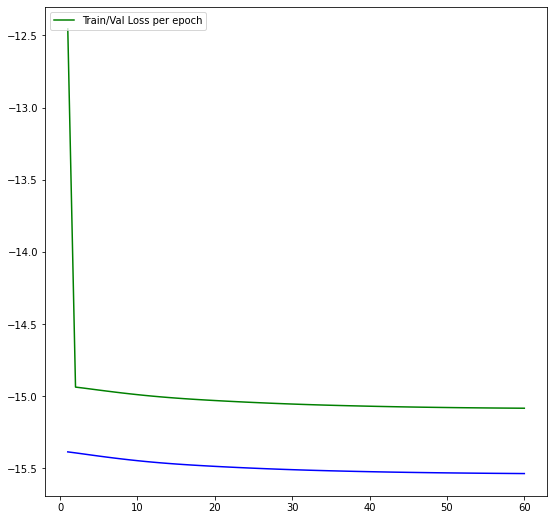

In [794]:
x = SIAMESE_STATS["epochs"]
y1 = _bring_to_cpu(SIAMESE_STATS["loss_by_epoch"])
y2 = _bring_to_cpu(SIAMESE_STATS["loss_by_epoch_val"])

plt.figure(figsize=(9,9))
plt.plot(x, y1, color = "green")
plt.plot(x, y2, color = "blue")
title = "Train/Val" + " " + "Loss" + " per epoch"
plt.legend([title], loc='upper left')

plt.show()

## Evolución perdida Val

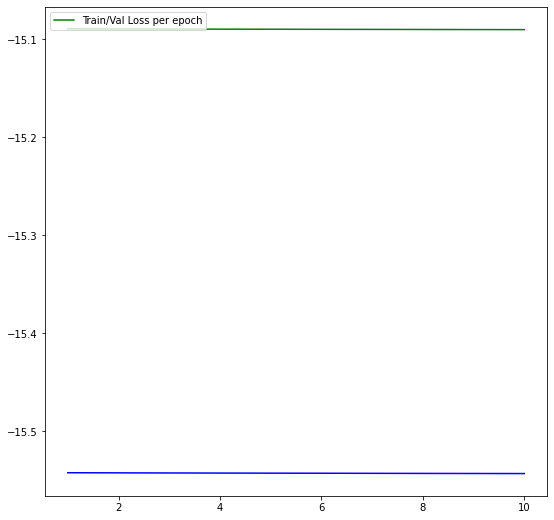

In [807]:
x = SIAMESE_STATS["epochs"]
y1 = _bring_to_cpu(SIAMESE_STATS["loss_by_epoch"])
y2 = _bring_to_cpu(SIAMESE_STATS["loss_by_epoch_val"])

plt.figure(figsize=(9,9))
plt.plot(x, y1, color = "green")
plt.plot(x, y2, color = "blue")
title = "Train/Val" + " " + "Loss" + " per epoch"
plt.legend([title], loc='upper left')

plt.show()


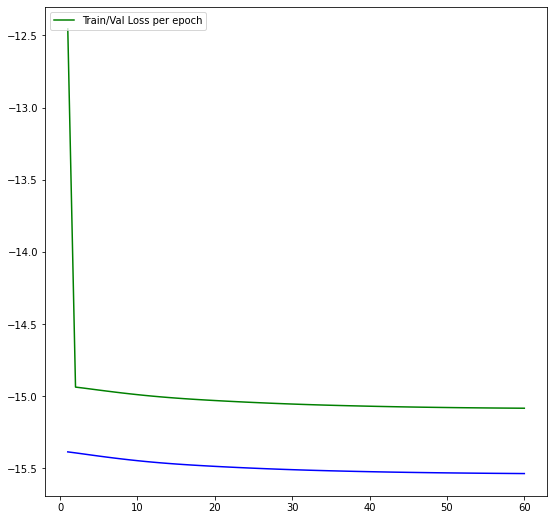

In [795]:
plt.figure(figsize=(10,7))

x = SIAMESE_STATS["epochs"]
y1 = np.array(SIAMESE_STATS["loss_by_epoch"])[:, 0]
y2 = np.array(SIAMESE_STATS["loss_by_epoch"])[:, 0


plt.plot(x, , color = "red")
plt.plot(x, ], color = "blue")
plt.legend(['Precisión de Entrenamiento mse', 'Precisión de Validación mse'], loc='upper left')

plt.show()

## Ambas desde época 3

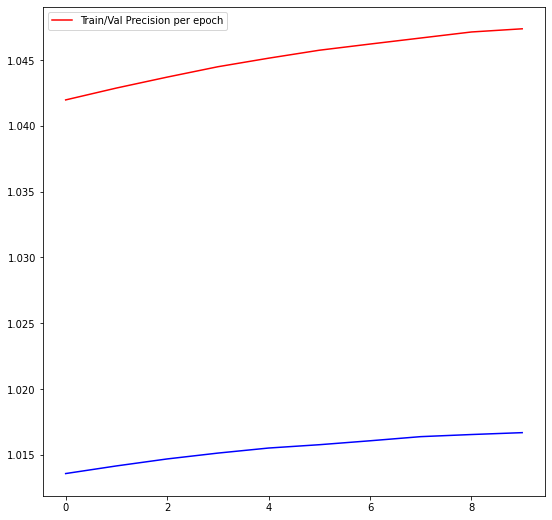

In [809]:

y1 = np.array(SIAMESE_STATS["train_precision"])[:, 0]
x = [i for i in range(len(y1))]
y2 = np.array(SIAMESE_STATS["val_precision"])[:, 0]
plt.figure(figsize=(9,9))

plt.plot(x, y1, color = "red")
plt.plot(x, y2, color = "blue")

title = "Train/Val" + " " + "Precision" + " per epoch"
plt.legend([title], loc='upper left')
plt.show()

# Rendimiento set de Test - Siamesa

In [ ]:
X_train_siamese = X_train_siamese.to(device)

SIAMESA_LSTM_INSTANCE.eval()
output_val, _ = SIAMESA_LSTM_INSTANCE(X_train_siamese)
pred_val = _predict(output_val)
prec_val = _accuracy(pred_val, y_val)/ len(X_train_siamese)

Comente brevemente sobre la capacidad de generalización

Vemos que nuestro modelo logra un rendimiento del en el set de entrenamiento.




# **Actividad 10** TNSE(F(I))

Tome todas las oraciones asociada a la validación y a cada una de esas palabras aplique la función f. Es decir, obtendremos f(I). A estos vectores aplique t−SNE y visualice en 2D todas estas oraciones.

Ahora lo que haremos será aplicar la función $ f(I) $ a todos los textos del set de validación. 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


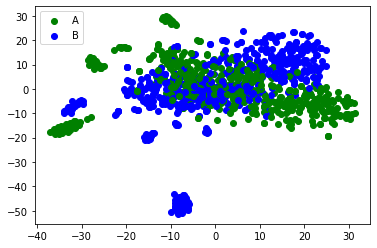

In [811]:
from sklearn.manifold import TSNE
import numpy as np


%matplotlib inline

def tsne_plot(features_siam_1_val, features_siam_2_val):
  tsne_model = TSNE(n_components=2, random_state=0)
  A_sentences = tsne_model.fit_transform(np.array(features_siam_1_val.tolist())[:,0,:])
  B_sentences = tsne_model.fit_transform(np.array(features_siam_2_val.tolist())[:,0,:])

  for i in range(len(A_sentences)):
    A_component_x = A_sentences[i][0]
    A_component_y = A_sentences[i][1]

    B_component_x = B_sentences[i][0]
    B_component_y = B_sentences[i][1]

    plt.scatter(A_component_x, A_component_y, c='green')
    plt.scatter(B_component_x, B_component_y, c='blue')

  plt.legend(['A', 'B'], loc='upper left')
  plt.show()

tsne_plot(SIAMESE_STATS["features_siam_1_val"], SIAMESE_STATS["features_siam_2_val"])

# **Actividad 11** KNN sobre espacio TSNE

Aplique K-Means con 5 grupos a las oraciones del set de validacio ́n una vez que se les aplic ́o f y que se haya aplicado tambi ́en t−SNE. Visualice estos clusters. Muestre con algunos ejemplos que efectivamente las oraciones que pertenecen al mismo cluster tienen relacio ́n sema ́ntica.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


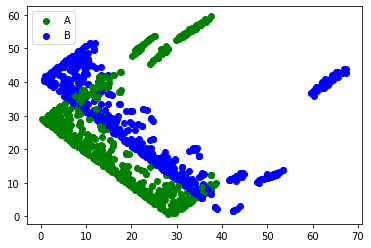

In [812]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

def tsne_plot(features_siam_1_val, features_siam_2_val):
  "Creates and TSNE model and plots it"
  _A_sentences = np.array(features_siam_1_val.tolist())[:,0,:]
  _B_sentences = np.array(features_siam_2_val.tolist())[:,0,:]
  tsne_model = TSNE(n_components=2, random_state=0)
  a_kcomponents = KMeans(n_clusters=5, random_state=0).fit_transform(tsne_model.fit_transform(_A_sentences))
  b_kcomponents = KMeans(n_clusters=5, random_state=0).fit_transform(tsne_model.fit_transform(_B_sentences))  

  for i in range(len(a_kcomponents)):
    A_component_x = a_kcomponents[i][0]
    A_component_y = a_kcomponents[i][1]

    B_component_x = b_kcomponents[i][0]
    B_component_y = b_kcomponents[i][1]

    plt.scatter(A_component_x, A_component_y, c='green')
    plt.scatter(B_component_x, B_component_y, c='blue')

  plt.legend(['A', 'B'], loc='upper left')

  plt.show()

tsne_plot(SIAMESE_STATS["features_siam_1_val"], SIAMESE_STATS["features_siam_2_val"])

# Comentarios

Podemos ver que efectivamente existe correlación espacial entre los grupos de frases relacionadas y no relacionadas.

Existe intersección de conjuntos entre los espacios de A y B, y existen puntos que se alejan de esta intersección, denotando que no son similares